<a href="https://colab.research.google.com/github/juacarato10/challenge2-data-science/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [5]:
import pandas as pd
import json
import requests # Importar la librería requests para hacer peticiones HTTP

# Define la URL directa al archivo JSON en GitHub
# Asegúrate de que esta URL sea la URL "raw" del archivo JSON en GitHub.
# Por ejemplo: https://raw.githubusercontent.com/tu_usuario/tu_repositorio/main/tu_archivo.json
json_url = 'https://raw.githubusercontent.com/juacarato10/challenge2-data-science/refs/heads/main/TelecomX_Data.json' # URL de ejemplo, reemplázala con la tuya

try:
    print(f"Intentando descargar datos desde: {json_url}")
    # Realizar una petición GET a la URL
    response = requests.get(json_url)

    # Verificar si la petición fue exitosa (código de estado 200)
    response.raise_for_status() # Lanza una excepción si el código de estado no es 200 (ej. 404, 500)

    # Cargar los datos JSON desde el contenido de la respuesta
    data = json.loads(response.text)

    # Normalizar los datos JSON y crear un DataFrame
    df = pd.json_normalize(data)

    # Mostrar las primeras filas del DataFrame
    print("DataFrame creado exitosamente. Primeras 5 filas:")
    print(df.head())

    # Mostrar información básica sobre el DataFrame
    print("\nInformación del DataFrame:")
    df.info()

except requests.exceptions.RequestException as req_err:
    print(f"Error de conexión o petición HTTP: {req_err}")
    print("Asegúrate de que la URL sea correcta y tengas conexión a internet.")
except json.JSONDecodeError as jde:
    print(f"Error al decodificar el JSON. Asegúrate de que el contenido de la URL sea un JSON válido: {jde}")
except Exception as e:
    print(f"Ocurrió un error inesperado al cargar o procesar los datos: {e}")

Intentando descargar datos desde: https://raw.githubusercontent.com/juacarato10/challenge2-data-science/refs/heads/main/TelecomX_Data.json
DataFrame creado exitosamente. Primeras 5 filas:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3      

#🔧 Transformación

In [11]:
import pandas as pd
import json
import requests # Importar la librería requests para hacer peticiones HTTP

# Define la URL directa al archivo JSON en GitHub
# Asegúrate de que esta URL sea la URL "raw" del archivo JSON en GitHub.
# Por ejemplo: https://raw.githubusercontent.com/tu_usuario/tu_repositorio/main/tu_archivo.json
json_url = 'https://raw.githubusercontent.com/juacarato10/challenge2-data-science/refs/heads/main/TelecomX_Data.json' # URL de ejemplo, reemplázala con la tuya

try:
    print(f"Intentando descargar datos desde: {json_url}")
    # Realizar una petición GET a la URL
    response = requests.get(json_url)

    # Verificar si la petición fue exitosa (código de estado 200)
    response.raise_for_status() # Lanza una excepción si el código de estado no es 200 (ej. 404, 500)

    # Cargar los datos JSON desde el contenido de la respuesta
    data = json.loads(response.text)

    # Normalizar los datos JSON y crear un DataFrame
    df = pd.json_normalize(data)

    # Mostrar las primeras filas del DataFrame
    print("DataFrame creado exitosamente. Primeras 5 filas:")
    print(df.head())

    # Mostrar información básica sobre el DataFrame
    print("\nInformación del DataFrame:")
    df.info()

    # --- Exploración de Columnas y Tipos de Datos ---
    print("\n--- Exploración de Columnas y Tipos de Datos ---")
    print("Nombres de las columnas:")
    print(df.columns.tolist()) # Muestra todos los nombres de las columnas

    # df.info() ya proporciona los tipos de datos, pero podemos reiterarlo de forma más concisa
    print("\nTipos de datos de cada columna:")
    print(df.dtypes)

    # --- Interpretación de Variables (sin diccionario explícito) ---
    print("\n--- Interpretación de Variables (Basado en nombres de columnas) ---")
    print("Dado que no se proporcionó un diccionario de datos explícito, interpretamos las variables basándonos en sus nombres:")
    print("- 'customerID': Identificador único del cliente.")
    print("- 'Churn': Variable objetivo, indica si el cliente se fue (Yes/No).")
    print("- 'customer.gender': Género del cliente.")
    print("- 'customer.SeniorCitizen': Indica si el cliente es un ciudadano de la tercera edad (0/1).")
    print("- 'customer.Partner': Indica si el cliente tiene pareja (Yes/No).")
    print("- 'customer.Dependents': Indica si el cliente tiene dependientes (Yes/No).")
    print("- 'customer.tenure': Número de meses que el cliente ha permanecido con la compañía.")
    print("- 'phone.PhoneService': Indica si el cliente tiene servicio telefónico (Yes/No).")
    print("- 'phone.MultipleLines': Indica si el cliente tiene múltiples líneas (Yes/No/No phone service).")
    print("- 'internet.InternetService': Tipo de servicio de internet (DSL/Fiber optic/No).")
    print("- 'internet.OnlineSecurity': Indica si el cliente tiene seguridad en línea (Yes/No/No internet service).")
    print("- 'internet.OnlineBackup': Indica si el cliente tiene copia de seguridad en línea (Yes/No/No internet service).")
    print("- 'internet.DeviceProtection': Indica si el cliente tiene protección de dispositivo (Yes/No/No internet service).")
    print("- 'internet.TechSupport': Indica si el cliente tiene soporte técnico (Yes/No/No internet service).")
    print("- 'internet.StreamingTV': Indica si el cliente tiene servicio de streaming de TV (Yes/No/No internet service).")
    print("- 'internet.StreamingMovies': Indica si el cliente tiene servicio de streaming de películas (Yes/No/No internet service).")
    print("- 'account.Contract': Tipo de contrato del cliente (Month-to-month/One year/Two year).")
    print("- 'account.PaperlessBilling': Indica si el cliente tiene facturación sin papel (Yes/No).")
    print("- 'account.PaymentMethod': Método de pago del cliente.")
    print("- 'account.Charges.Monthly': Cargo mensual total del cliente.")
    print("- 'account.Charges.Total': Cargo total acumulado del cliente.")
    print("\nPara un análisis más profundo, sería ideal contar con un diccionario de datos oficial.")


    # --- Identificación de Columnas Relevantes para el Análisis de Evasión ---
    print("\n--- Columnas Relevantes para el Análisis de Evasión (Churn) ---")
    print("Basado en la experiencia con datasets de telecomunicaciones, las siguientes columnas son típicamente relevantes para predecir la evasión:")
    relevant_columns = [
        'Churn', # Variable objetivo
        'customer.gender',
        'customer.SeniorCitizen',
        'customer.Partner',
        'customer.Dependents',
        'customer.tenure', # La antigüedad es crucial
        'phone.PhoneService',
        'phone.MultipleLines',
        'internet.InternetService',
        'internet.OnlineSecurity',
        'internet.OnlineBackup',
        'internet.DeviceProtection',
        'internet.TechSupport',
        'internet.StreamingTV',
        'internet.StreamingMovies',
        'account.Contract', # El tipo de contrato es muy influyente
        'account.PaperlessBilling',
        'account.PaymentMethod',
        'account.Charges.Monthly',
        'account.Charges.Total' # Los cargos totales también son importantes
    ]
    print(relevant_columns)
    print("\nEstas columnas cubren aspectos demográficos, servicios contratados, duración de la relación con el cliente y patrones de facturación, todos los cuales suelen ser predictores clave de la evasión.")

    # --- Verificación de Problemas en los Datos ---
    print("\n--- Verificación de Problemas en los Datos ---")

    # 1. Valores Ausentes
    print("\n1. Conteo de Valores Ausentes por Columna (Antes de Correcciones):")
    print(df.isnull().sum())

    # 2. Duplicados
    num_duplicates_before = df.duplicated().sum()
    print(f"\n2. Número de Filas Duplicadas (Antes de Correcciones): {num_duplicates_before}")


    # 3. Errores de Formato e Inconsistencias en 'account.Charges.Total'
    print("\n3. Verificación y Limpieza de 'account.Charges.Total':")
    # Reemplazar espacios en blanco con NaN antes de convertir a numérico
    df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', pd.NA)
    # Convertir a numérico, con 'coerce' para convertir errores en NaN
    df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
    # Verificar si hay NaNs después de la conversión (errores originales o espacios en blanco)
    total_charges_na_after_conversion = df['account.Charges.Total'].isnull().sum()
    if total_charges_na_after_conversion > 0:
        print(f"Se encontraron {total_charges_na_after_conversion} valores no numéricos o en blanco en 'account.Charges.Total' y se convirtieron a NaN.")
    else:
        print("'account.Charges.Total' se ha convertido a numérico exitosamente sin nuevos valores NaN.")
    print(f"Tipo de dato de 'account.Charges.Total' después de la limpieza: {df['account.Charges.Total'].dtype}")

    # --- Aplicación de Correcciones ---
    print("\n--- Aplicando Correcciones a los Datos ---")

    # Corrección 1: Manejar valores NaN en 'account.Charges.Total'
    # Observación: Los valores NaN en 'account.Charges.Total' a menudo corresponden a 'tenure' = 0.
    # Estos clientes probablemente son nuevos y aún no han acumulado cargos totales.
    # Una estrategia común es eliminar estas filas si son pocas o si no son representativas del comportamiento de churn.
    # Vamos a eliminar las filas donde 'account.Charges.Total' es NaN.
    initial_rows = df.shape[0]
    df.dropna(subset=['account.Charges.Total'], inplace=True)
    rows_after_charges_na_drop = df.shape[0]
    print(f"Filas eliminadas debido a NaN en 'account.Charges.Total': {initial_rows - rows_after_charges_na_drop}")

    # Corrección 2: Eliminar filas duplicadas
    num_duplicates_before_drop = df.duplicated().sum()
    if num_duplicates_before_drop > 0:
        df.drop_duplicates(inplace=True)
        num_duplicates_after_drop = df.duplicated().sum()
        print(f"Filas duplicadas eliminadas: {num_duplicates_before_drop - num_duplicates_after_drop}")
    else:
        print("No se encontraron filas duplicadas para eliminar.")

    # Corrección 3: Normalizar inconsistencias en categorías (valores únicos)
    # Convertir todas las columnas de tipo 'object' a minúsculas y eliminar espacios en blanco
    print("\nNormalizando valores categóricos (a minúsculas y sin espacios):")
    categorical_cols_to_normalize = [col for col in df.columns if df[col].dtype == 'object' and col != 'customerID']
    for col in categorical_cols_to_normalize:
        if df[col].dtype == 'object': # Asegurarse de que sigue siendo un objeto
            df[col] = df[col].astype(str).str.lower().str.strip()
            print(f"Columna '{col}' normalizada. Nuevos valores únicos (primeros 10): {df[col].unique()[:10]}")

    # --- Crear la columna "Cuentas_Diarias" ---
    print("\n--- Creando la columna 'Cuentas_Diarias' ---")
    # Asumiendo 30 días en un mes para el cálculo diario
    df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30
    print("Columna 'Cuentas_Diarias' creada exitosamente.")
    print("Primeras 5 filas con la nueva columna 'Cuentas_Diarias':")
    print(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

    # --- Estandarización y Transformación de Datos ---
    print("\n--- Estandarización y Transformación de Datos ---")

    # 1. Convertir 'Yes'/'No' a binario (1/0)
    binary_cols = [
        'churn',
        'customer.partner',
        'customer.dependents',
        'phone.phoneservice',
        'phone.multiplelines', # 'no phone service' también se manejará aquí
        'internet.onlinesecurity',
        'internet.onlinebackup',
        'internet.deviceprotection',
        'internet.techsupport',
        'internet.streamingtv',
        'internet.streamingmovies',
        'account.paperlessbilling'
    ]

    for col in binary_cols:
        # Asegurarse de que la columna existe y es de tipo objeto
        if col in df.columns and df[col].dtype == 'object':
            # Convertir 'yes' a 1 y 'no' a 0
            # Para 'phone.multiplelines' y columnas de internet, 'no phone service'/'no internet service' también se mapearán a 0
            df[col] = df[col].map({'yes': 1, 'no': 0, 'no phone service': 0, 'no internet service': 0}).infer_objects(copy=False)
            print(f"Columna '{col}' convertida a binario. Tipo de dato: {df[col].dtype}")
            print(f"Valores únicos de '{col}' después de la conversión: {df[col].unique()}")

    # 2. Renombrar columnas para mayor claridad
    # Eliminamos el prefijo 'customer.', 'phone.', 'internet.', 'account.Charges.'
    new_column_names = {
        'customer.gender': 'gender',
        'customer.seniorcitizen': 'seniorcitizen',
        'customer.partner': 'partner',
        'customer.dependents': 'dependents',
        'customer.tenure': 'tenure',
        'phone.phoneservice': 'phoneservice',
        'phone.multiplelines': 'multiplelines',
        'internet.internetservice': 'internetservice',
        'internet.onlinesecurity': 'onlinesecurity',
        'internet.onlinebackup': 'onlinebackup',
        'internet.deviceprotection': 'deviceprotection',
        'internet.techsupport': 'techsupport',
        'internet.streamingtv': 'streamingtv',
        'internet.streamingmovies': 'streamingmovies',
        'account.contract': 'contract',
        'account.paperlessbilling': 'paperlessbilling',
        'account.paymentmethod': 'paymentmethod',
        'account.charges.monthly': 'monthlycharges',
        'account.charges.total': 'totalcharges',
        'churn': 'churn' # Asegurarse de que churn también esté en minúsculas si no lo estaba
    }

    # Renombrar columnas existentes
    df.rename(columns=new_column_names, inplace=True)
    print("\nColumnas renombradas para mayor claridad.")
    print("Nuevos nombres de columnas (primeros 20):")
    print(df.columns.tolist()[:20]) # Mostrar solo los primeros 20 para no saturar

    # 3. Convertir 'seniorcitizen' a binario si aún no lo está (ya está en 0/1, pero para consistencia)
    # df['seniorcitizen'] = df['seniorcitizen'].map({0: 0, 1: 1}).infer_objects(copy=False)
    # No es necesario si ya viene como 0/1 y es numérico.

    print("\n--- Resumen del DataFrame después de las Correcciones, Adiciones y Transformaciones ---")
    print(f"Número total de filas después de las transformaciones: {df.shape[0]}")
    print("\nConteo de Valores Ausentes por Columna (Después de Transformaciones):")
    print(df.isnull().sum())
    print("\nInformación del DataFrame (Después de Transformaciones):")
    df.info()
    print("\nPrimeras 5 filas del DataFrame (Después de Transformaciones):")
    print(df.head())


except requests.exceptions.RequestException as req_err:
    print(f"Error de conexión o petición HTTP: {req_err}")
    print("Asegúrate de que la URL sea correcta y tengas conexión a internet.")
except json.JSONDecodeError as jde:
    print(f"Error al decodificar el JSON. Asegúrate de que el contenido de la URL sea un JSON válido: {jde}")
except Exception as e:
    print(f"Ocurrió un error inesperado al cargar o procesar los datos: {e}")

Intentando descargar datos desde: https://raw.githubusercontent.com/juacarato10/challenge2-data-science/refs/heads/main/TelecomX_Data.json
DataFrame creado exitosamente. Primeras 5 filas:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3      

#📊 Carga y análisis

                                  INFORME DE ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)

--- 🔹 Introducción ---
Este informe detalla un análisis exhaustivo del problema de evasión de clientes (Churn) en una empresa de telecomunicaciones.
El objetivo principal es identificar los factores clave que influyen en la decisión de los clientes de cancelar sus servicios,
proporcionando insights valiosos y recomendaciones estratégicas para reducir la tasa de churn.
La evasión de clientes es un desafío crítico para las empresas, ya que la retención de clientes existentes suele ser más
rentable que la adquisición de nuevos. Comprender y predecir el churn permite a la empresa tomar medidas proactivas para
retener a sus clientes más valiosos.

Intentando descargar datos desde: https://raw.githubusercontent.com/juacarato10/challenge2-data-science/refs/heads/main/TelecomX_Data.json

DataFrame creado exitosamente. Primeras 5 filas del dataset original:
   customerID Churn customer.gender  customer.SeniorC

<ipython-input-25-bee54173bb2b>:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='viridis')


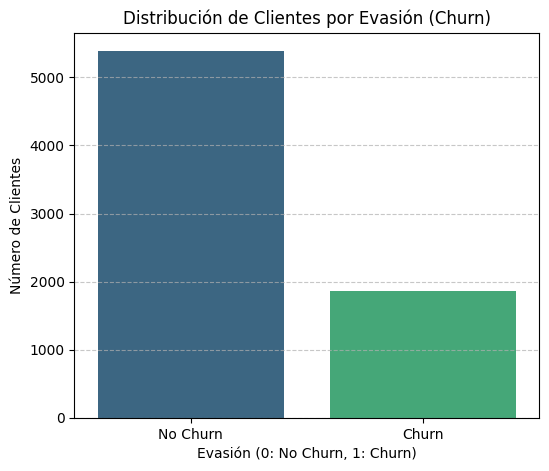


4. Exploración de Churn por Variables Categóricas:


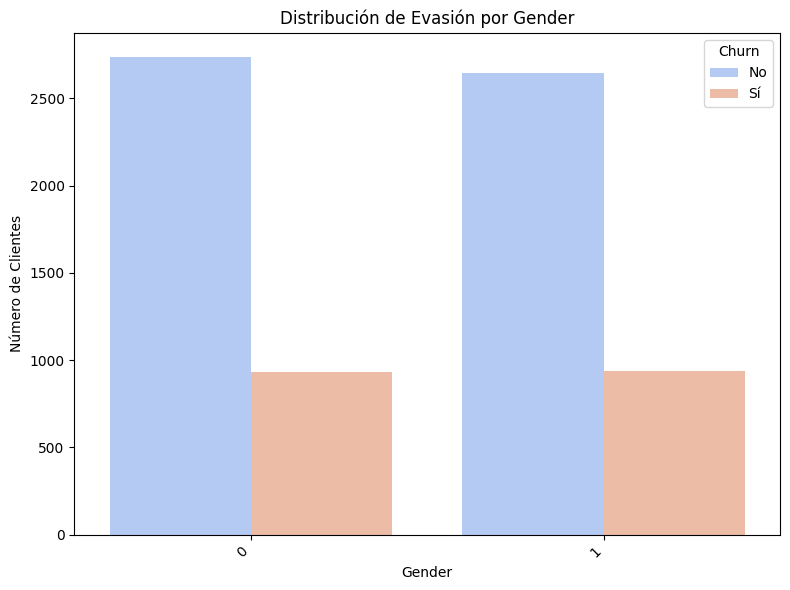

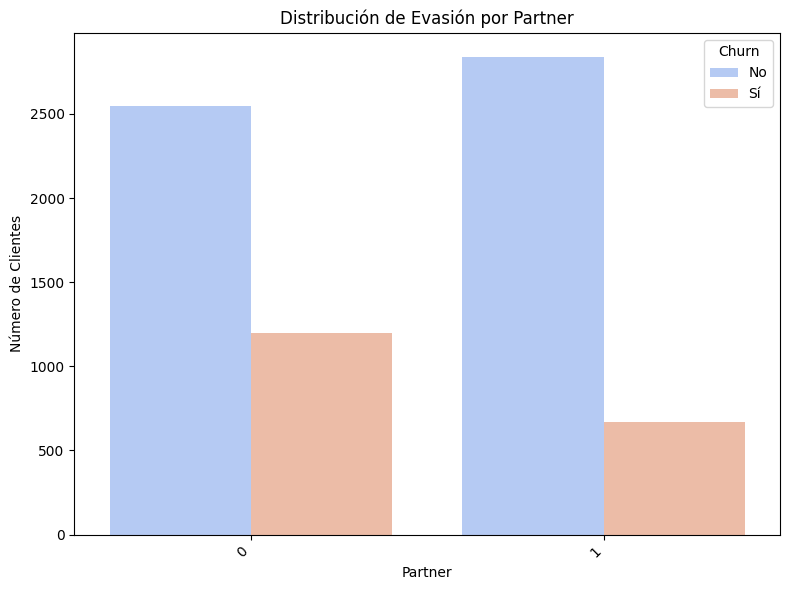

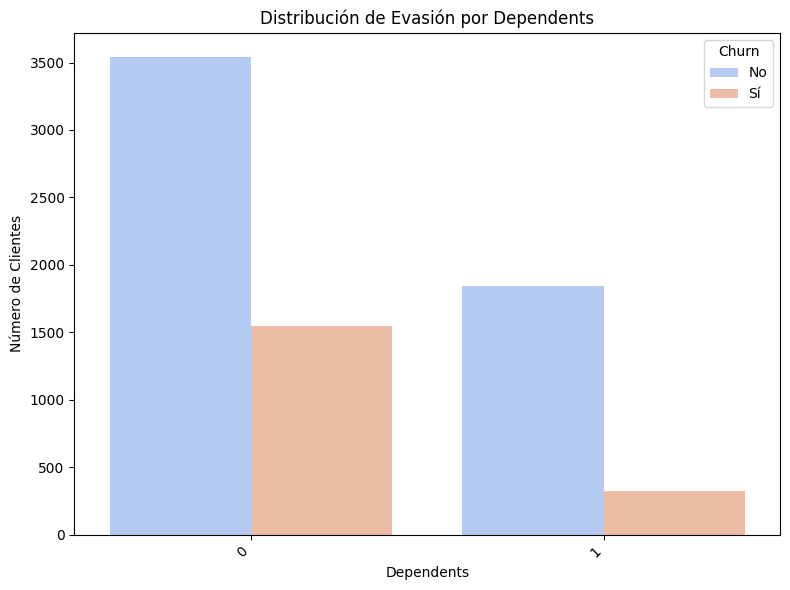

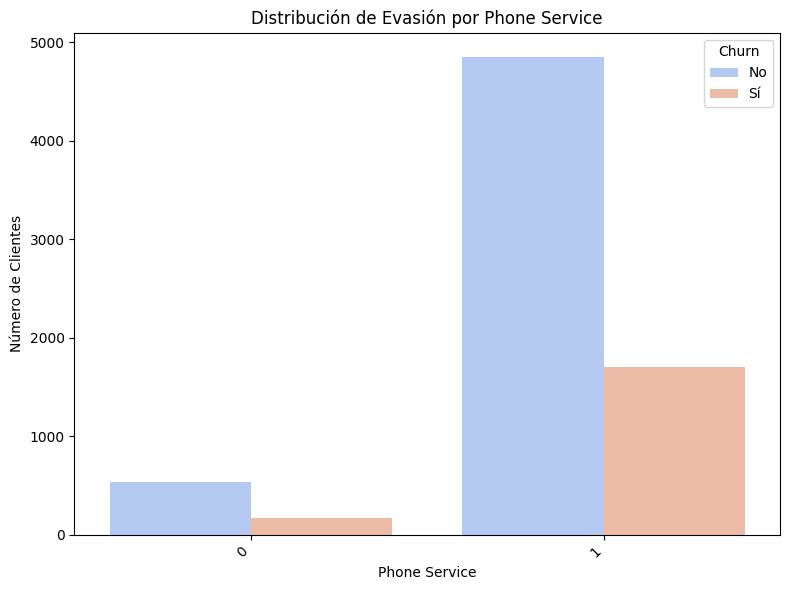

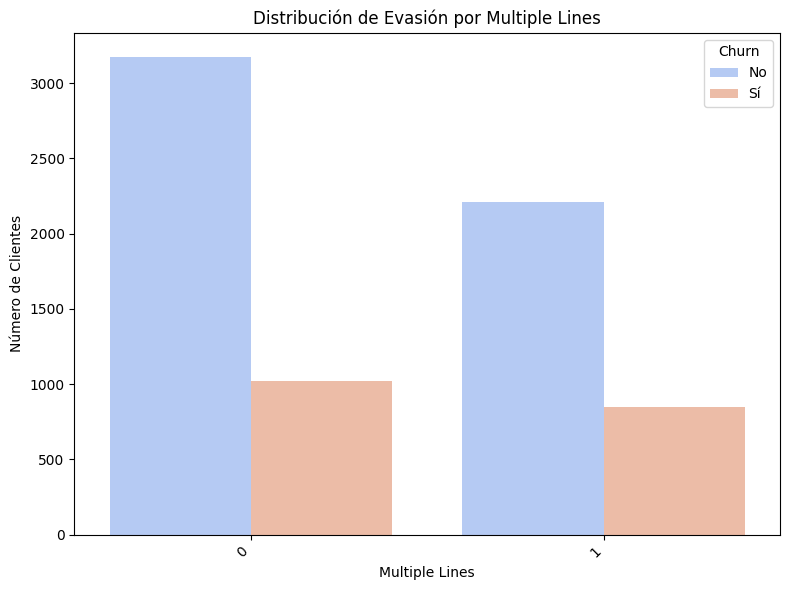

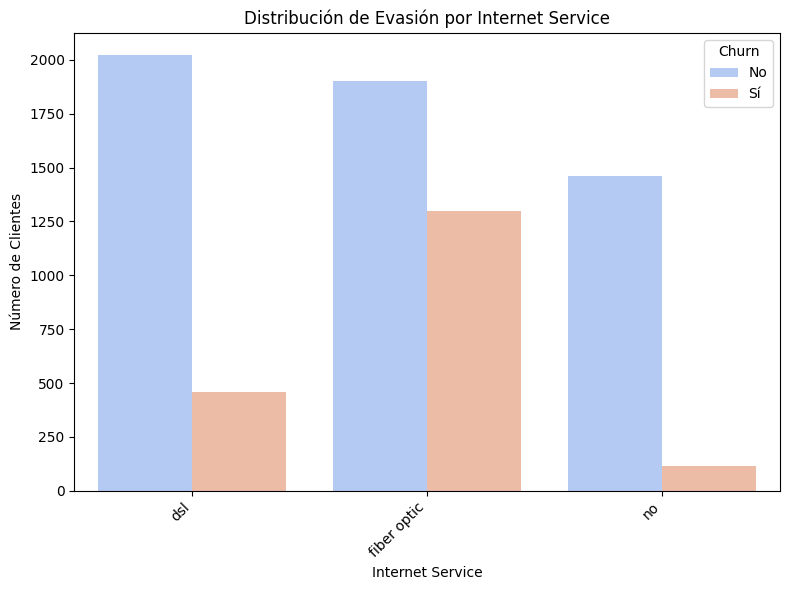

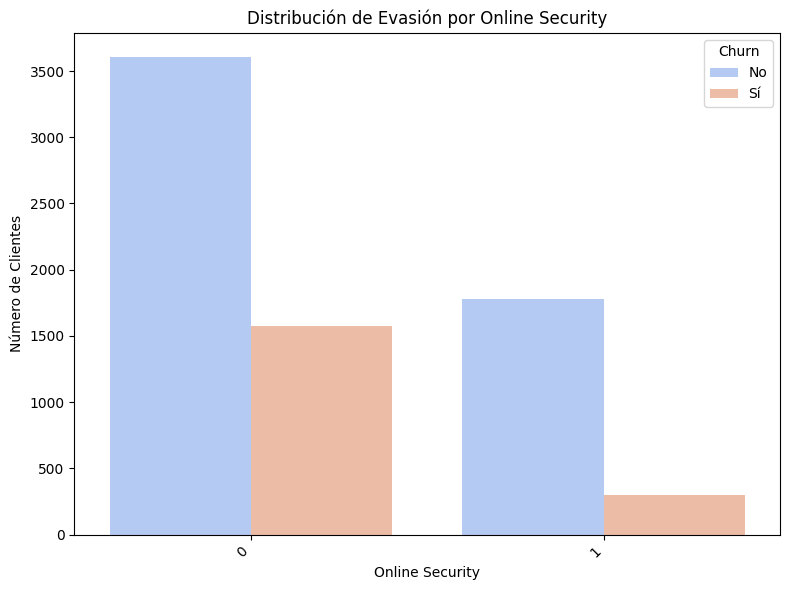

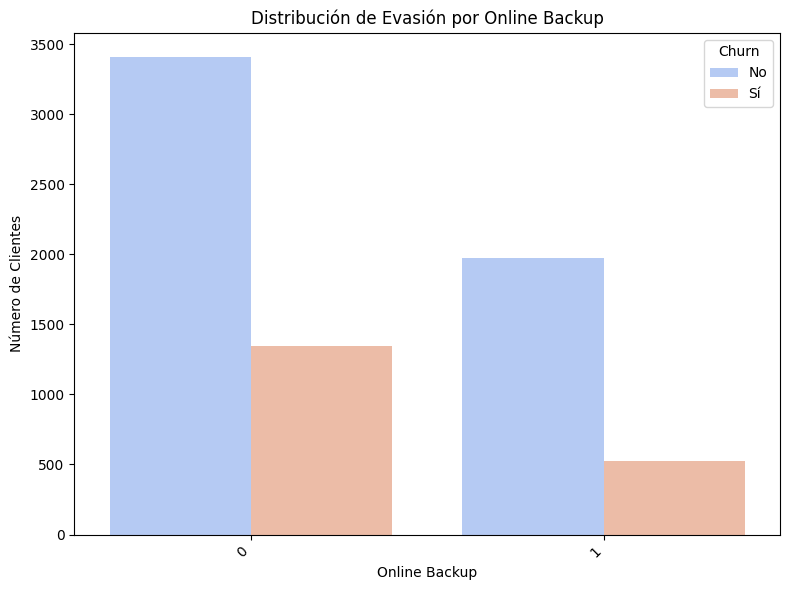

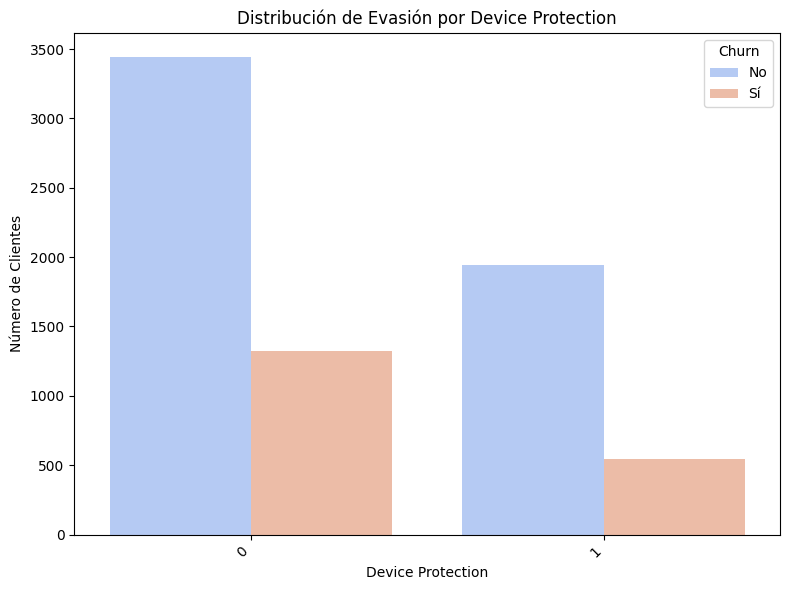

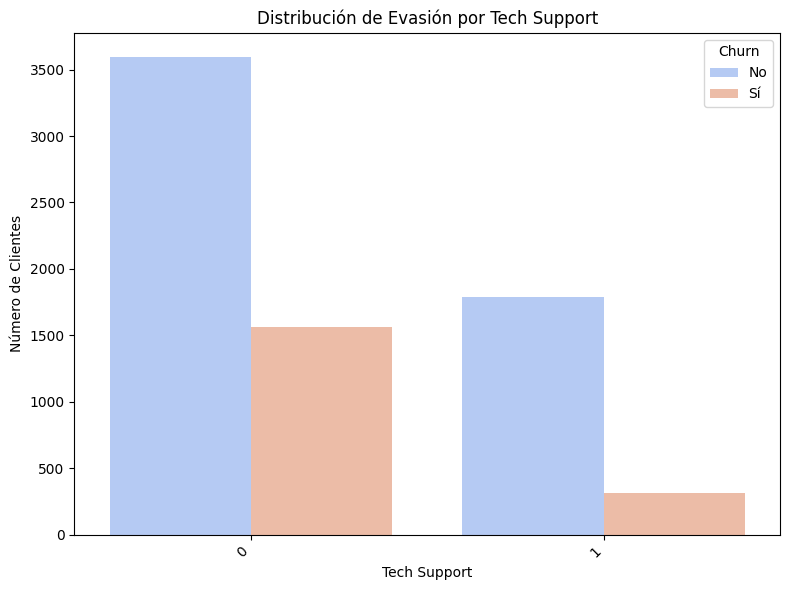

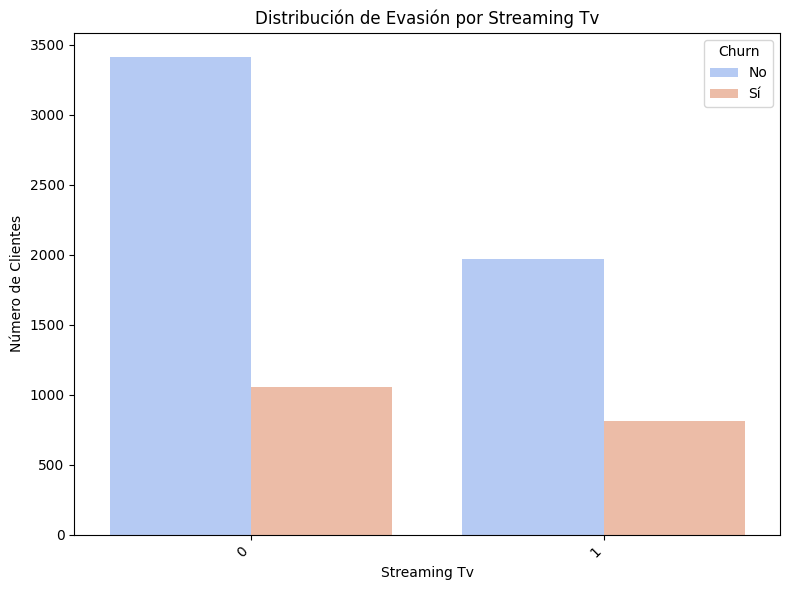

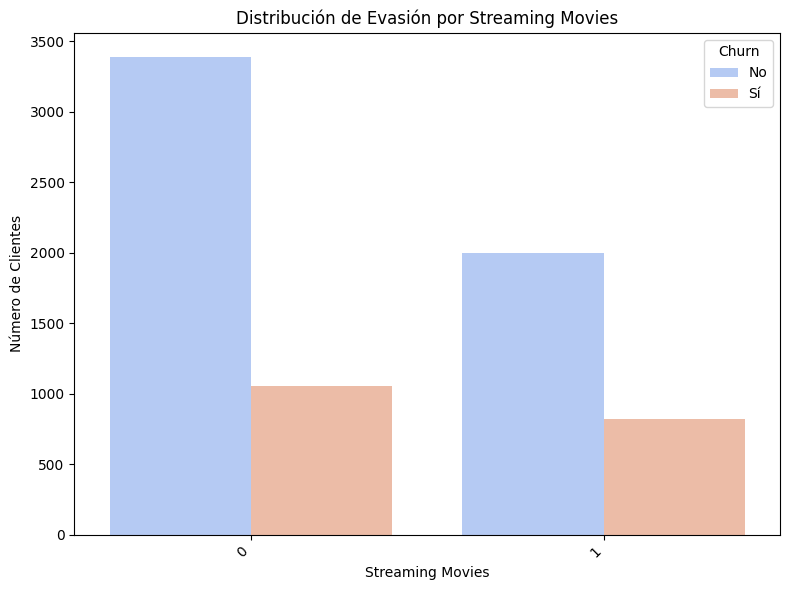

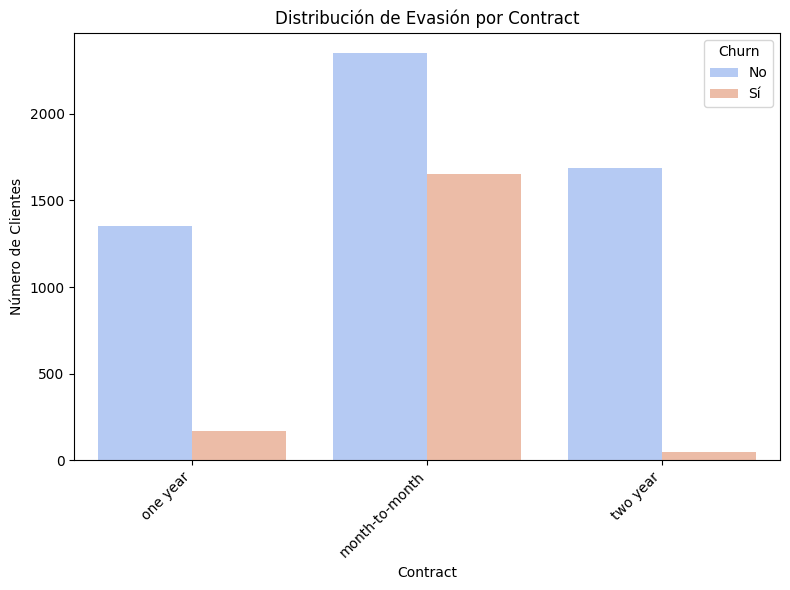

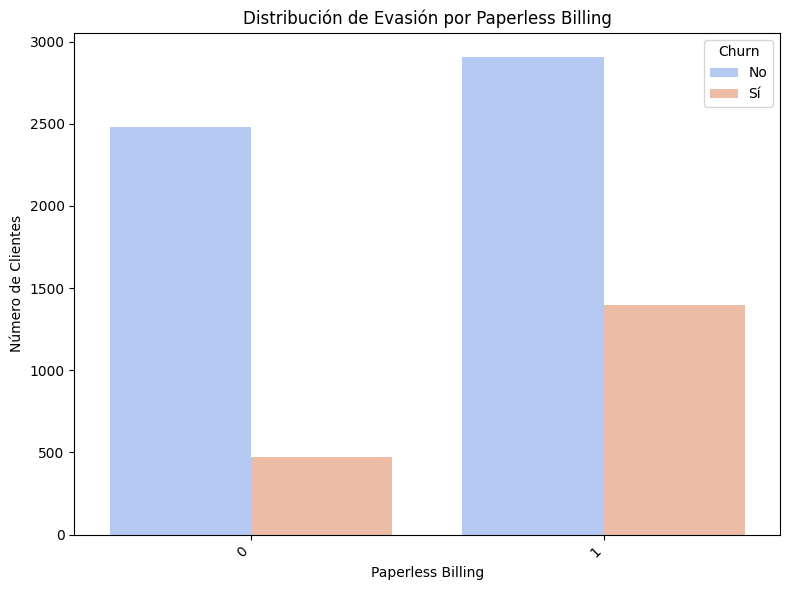

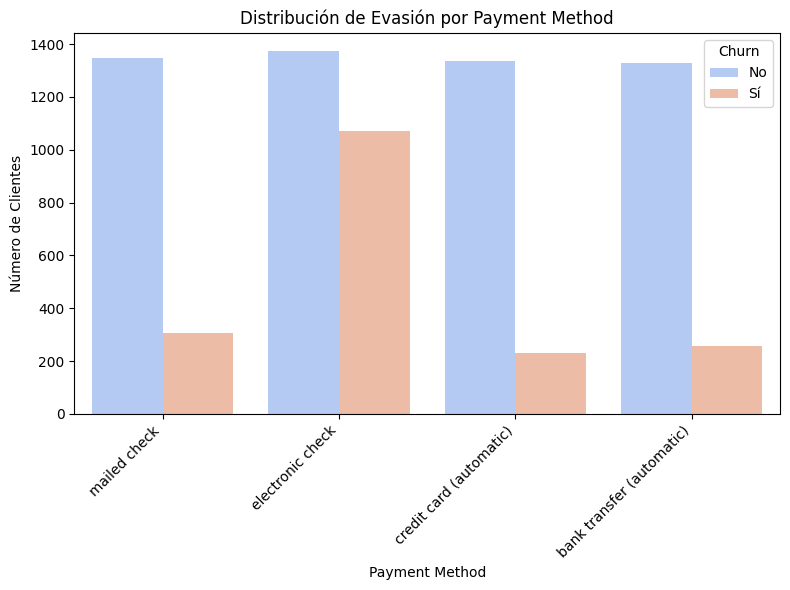

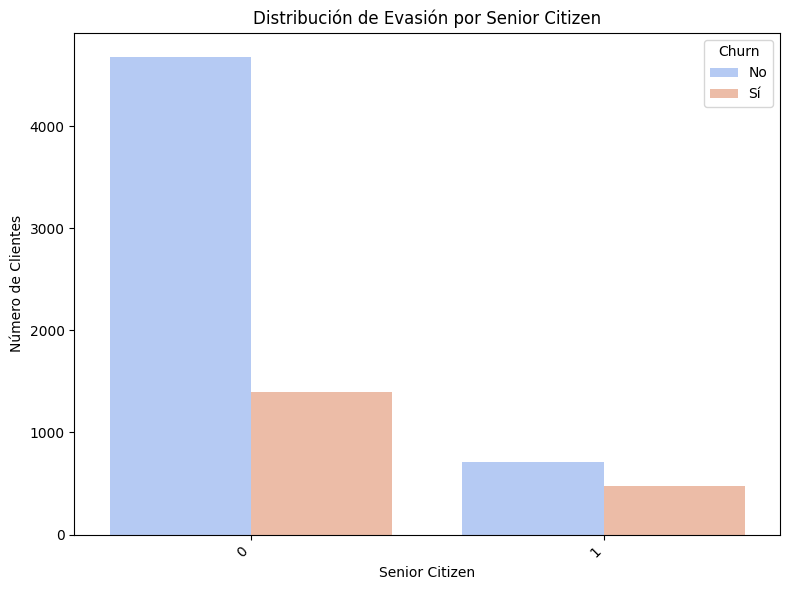


5. Exploración de Churn por Variables Numéricas:


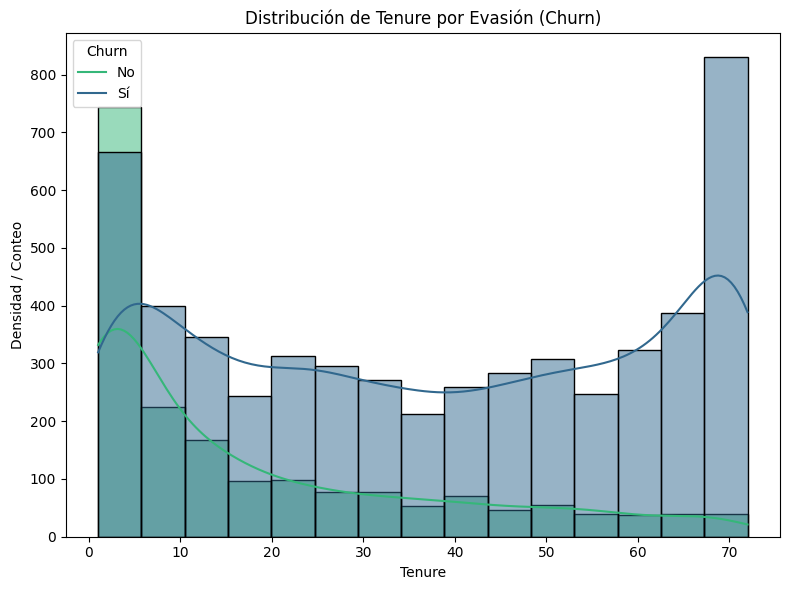

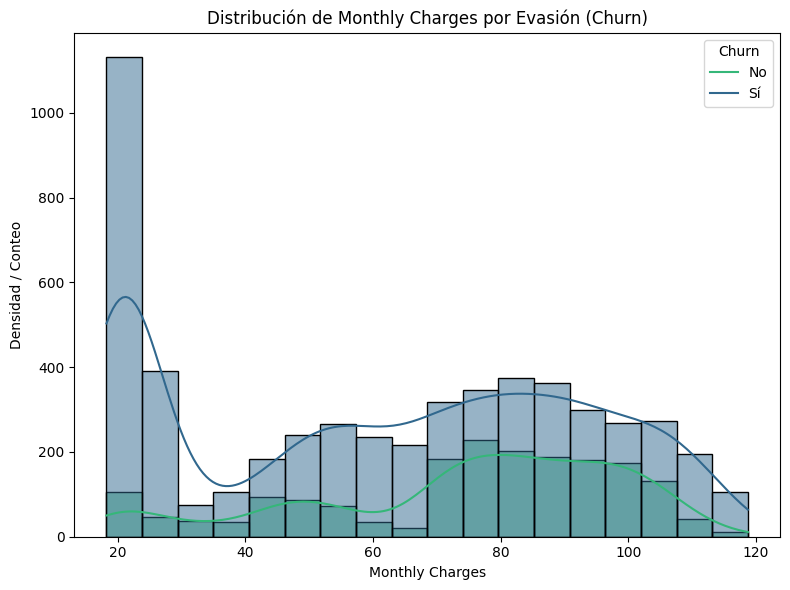

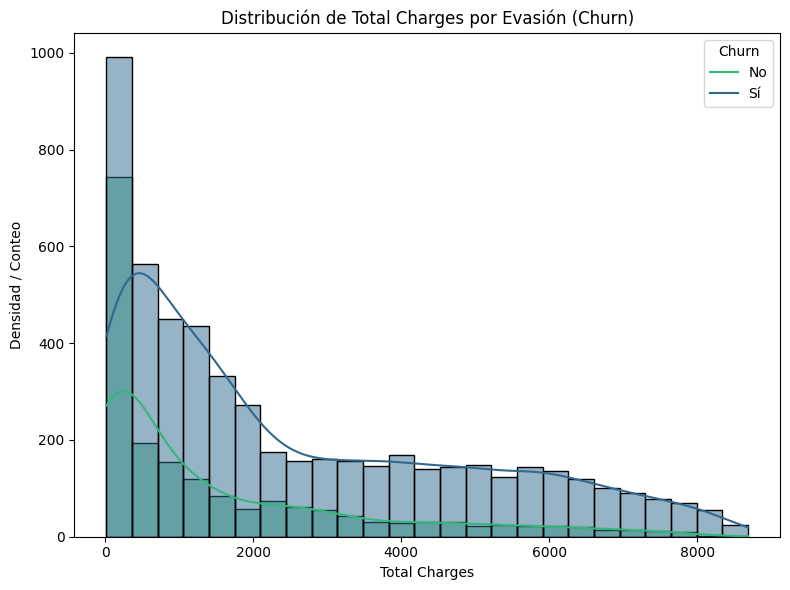

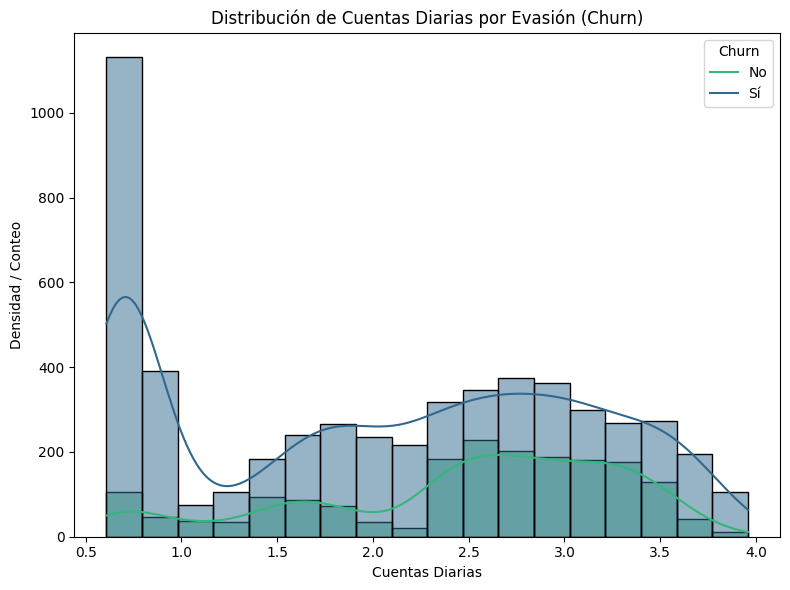



--- 🔹 Conclusiones e Insights ---
A partir del análisis exploratorio de datos, se extraen los siguientes hallazgos clave:
1.  **Desequilibrio de Clases en Churn**: La mayoría de los clientes no han evadido el servicio, lo que indica un desequilibrio en la variable objetivo. Esto es importante para la selección de modelos y métricas de evaluación.
2.  **Antigüedad (Tenure)**: Los clientes con menor antigüedad (pocos meses) tienen una tasa de evasión significativamente más alta. Esto sugiere que los primeros meses son críticos para la retención.
3.  **Tipo de Contrato**: Los clientes con contratos mes a mes presentan una tasa de evasión mucho mayor en comparación con aquellos con contratos de uno o dos años. Los contratos a largo plazo fomentan la lealtad.
4.  **Servicio de Internet (Fibra Óptica)**: Los clientes con servicio de fibra óptica muestran una tendencia más alta a evadir el servicio en comparación con DSL o sin servicio de internet. Esto podría indicar problemas de calidad o

In [25]:
import pandas as pd
import json
import requests # Importar la librería requests para hacer peticiones HTTP
import matplotlib.pyplot as plt # Importar matplotlib para graficar
import seaborn as sns # Importar seaborn para gráficos más estéticos

# Define la URL directa al archivo JSON en GitHub
# Asegúrate de que esta URL sea la URL "raw" del archivo JSON en GitHub.
# Por ejemplo: https://raw.githubusercontent.com/tu_usuario/tu_repositorio/main/tu_archivo.json
json_url = 'https://raw.githubusercontent.com/juacarato10/challenge2-data-science/refs/heads/main/TelecomX_Data.json' # URL de ejemplo, reemplázala con la tuya

try:
    # --- INICIO DEL REPORTE ---
    print("====================================================================================================")
    print("                                  INFORME DE ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)")
    print("====================================================================================================")

    # --- 🔹 Introducción ---
    print("\n--- 🔹 Introducción ---")
    print("Este informe detalla un análisis exhaustivo del problema de evasión de clientes (Churn) en una empresa de telecomunicaciones.")
    print("El objetivo principal es identificar los factores clave que influyen en la decisión de los clientes de cancelar sus servicios,")
    print("proporcionando insights valiosos y recomendaciones estratégicas para reducir la tasa de churn.")
    print("La evasión de clientes es un desafío crítico para las empresas, ya que la retención de clientes existentes suele ser más")
    print("rentable que la adquisición de nuevos. Comprender y predecir el churn permite a la empresa tomar medidas proactivas para")
    print("retener a sus clientes más valiosos.")

    print(f"\nIntentando descargar datos desde: {json_url}")
    # Realizar una petición GET a la URL
    response = requests.get(json_url)

    # Verificar si la petición fue exitosa (código de estado 200)
    response.raise_for_status() # Lanza una excepción si el código de estado no es 200 (ej. 404, 500)

    # Cargar los datos JSON desde el contenido de la respuesta
    data = json.loads(response.text)

    # Normalizar los datos JSON y crear un DataFrame
    df = pd.json_normalize(data)

    print("\nDataFrame creado exitosamente. Primeras 5 filas del dataset original:")
    print(df.head())

    print("\nInformación del DataFrame original:")
    df.info()

    # --- 🔹 Limpieza y Tratamiento de Datos ---
    print("\n\n--- 🔹 Limpieza y Tratamiento de Datos ---")
    print("Se realizaron los siguientes pasos para importar, limpiar y procesar los datos:")

    # --- Verificación de Problemas en los Datos (Pre-limpieza) ---
    print("\nVerificación Inicial de Problemas en los Datos:")
    print("\n1. Conteo de Valores Ausentes por Columna (Antes de Correcciones):")
    print(df.isnull().sum())
    num_duplicates_before = df.duplicated().sum()
    print(f"\n2. Número de Filas Duplicadas (Antes de Correcciones): {num_duplicates_before}")
    print("\n3. Verificación de 'account.Charges.Total' (Antes de Limpieza):")
    df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', pd.NA)
    df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
    total_charges_na_after_conversion = df['account.Charges.Total'].isnull().sum()
    if total_charges_na_after_conversion > 0:
        print(f"Se encontraron {total_charges_na_after_conversion} valores no numéricos o en blanco en 'account.Charges.Total' y se convirtieron a NaN.")
    else:
        print("'account.Charges.Total' se ha convertido a numérico exitosamente sin nuevos valores NaN.")
    print(f"Tipo de dato de 'account.Charges.Total' después de la limpieza inicial: {df['account.Charges.Total'].dtype}")


    print("\n--- Aplicando Correcciones a los Datos ---")

    # Corrección 1: Manejar valores NaN en 'account.Charges.Total'
    initial_rows = df.shape[0]
    df.dropna(subset=['account.Charges.Total'], inplace=True)
    rows_after_charges_na_drop = df.shape[0]
    print(f"Filas eliminadas debido a NaN en 'account.Charges.Total': {initial_rows - rows_after_charges_na_drop}")

    # Corrección 2: Eliminar filas duplicadas
    num_duplicates_before_drop = df.duplicated().sum()
    if num_duplicates_before_drop > 0:
        df.drop_duplicates(inplace=True)
        num_duplicates_after_drop = df.duplicated().sum()
        print(f"Filas duplicadas eliminadas: {num_duplicates_before_drop - num_duplicates_after_drop}")
    else:
        print("No se encontraron filas duplicadas para eliminar.")

    # Corrección 3: Normalizar inconsistencias en categorías (valores únicos)
    print("\nNormalizando valores categóricos (a minúsculas y sin espacios):")
    categorical_cols_to_normalize = [col for col in df.columns if df[col].dtype == 'object' and col != 'customerID']
    for col in categorical_cols_to_normalize:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.lower().str.strip()
            # print(f"Columna '{col}' normalizada. Nuevos valores únicos (primeros 10): {df[col].unique()[:10]}") # Comentado para no saturar la salida

    # --- Renombrar todas las columnas para mayor claridad y consistencia ---
    print("\nRenombrando columnas para mayor claridad y consistencia:")
    column_rename_map = {
        'customerID': 'customer_id',
        'Churn': 'churn',
        'customer.gender': 'gender',
        'customer.SeniorCitizen': 'senior_citizen',
        'customer.Partner': 'partner',
        'customer.Dependents': 'dependents',
        'customer.tenure': 'tenure',
        'phone.PhoneService': 'phone_service',
        'phone.MultipleLines': 'multiple_lines',
        'internet.InternetService': 'internet_service',
        'internet.OnlineSecurity': 'online_security',
        'internet.OnlineBackup': 'online_backup',
        'internet.DeviceProtection': 'device_protection',
        'internet.TechSupport': 'tech_support',
        'internet.StreamingTV': 'streaming_tv',
        'internet.StreamingMovies': 'streaming_movies',
        'account.Contract': 'contract',
        'account.PaperlessBilling': 'paperless_billing',
        'account.PaymentMethod': 'payment_method',
        'account.Charges.Monthly': 'monthly_charges',
        'account.Charges.Total': 'total_charges'
    }
    df.rename(columns=column_rename_map, inplace=True)
    print("Columnas renombradas exitosamente.")
    # print("Nuevos nombres de columnas (primeros 20):") # Comentado para no saturar la salida
    # print(df.columns.tolist()[:20])

    # --- Crear la columna "Cuentas_Diarias" ---
    print("\nCreando la columna 'cuentas_diarias' (facturación mensual / 30):")
    df['cuentas_diarias'] = df['monthly_charges'] / 30
    print("Columna 'cuentas_diarias' creada exitosamente.")
    # print("Primeras 5 filas con la nueva columna 'cuentas_diarias':") # Comentado para no saturar la salida
    # print(df[['monthly_charges', 'cuentas_diarias']].head())

    # --- Estandarización y Transformación de Datos ---
    print("\nEstandarización y Transformación de Datos (conversión a binario y manejo de NaNs):")
    binary_cols = [
        'churn', 'partner', 'dependents', 'phone_service', 'multiple_lines',
        'online_security', 'online_backup', 'device_protection',
        'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing'
    ]
    for col in binary_cols:
        if col in df.columns and df[col].dtype == 'object':
            df[col] = df[col].map({
                'yes': 1, 'no': 0, 'no phone service': 0, 'no internet service': 0
            }).fillna(0).astype(int)
            # print(f"Columna '{col}' convertida a binario. Tipo de dato: {df[col].dtype}") # Comentado para no saturar la salida
        elif col in df.columns and (df[col].dtype == 'int64' or df[col].dtype == 'float64'):
            pass # Ya es numérica, no se requiere conversión
        else:
            print(f"Advertencia: La columna '{col}' no se encontró o no es de tipo 'object' para la conversión binaria.")

    if 'gender' in df.columns and df['gender'].dtype == 'object':
        df['gender'] = df['gender'].map({'male': 0, 'female': 1}).fillna(0).astype(int)
        print("Columna 'gender' convertida a binario (male:0, female:1).")

    if df.empty:
        print("\nAdvertencia: El DataFrame está vacío después de las operaciones de limpieza. No se pueden realizar más análisis ni gráficos.")
        raise ValueError("DataFrame vacío después de la limpieza.")

    print("\n--- Resumen del DataFrame después de la Limpieza y Transformaciones ---")
    print(f"Número total de filas después de las correcciones: {df.shape[0]}")
    print("\nConteo de Valores Ausentes por Columna (Después de Transformaciones):")
    print(df.isnull().sum())
    print("\nInformación del DataFrame (Después de Transformaciones):")
    df.info()
    print("\nPrimeras 5 filas del DataFrame (Después de Transformaciones):")
    print(df.head())


    # --- 🔹 Análisis Exploratorio de Datos (EDA) ---
    print("\n\n--- 🔹 Análisis Exploratorio de Datos (EDA) ---")
    print("Se realizaron análisis descriptivos y visualizaciones para comprender la distribución y el comportamiento de los clientes.")

    print("\n1. Estadísticas Descriptivas para Columnas Numéricas:")
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if numeric_cols:
        print(df[numeric_cols].describe())
    else:
        print("No hay columnas numéricas para describir.")

    print("\n2. Conteo de Valores para Columnas Categóricas Clave:")
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    key_categorical_for_counts = [col for col in categorical_cols if col != 'customer_id']
    for col in key_categorical_for_counts:
        print(f"\nDistribución de '{col}':")
        print(df[col].value_counts())
        print(f"Porcentaje de Distribución de '{col}':")
        print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

    print("\n3. Visualización de la Distribución de 'churn':")
    if 'churn' in df.columns:
        plt.figure(figsize=(6, 5))
        sns.countplot(x='churn', data=df, palette='viridis')
        plt.title('Distribución de Clientes por Evasión (Churn)')
        plt.xlabel('Evasión (0: No Churn, 1: Churn)')
        plt.ylabel('Número de Clientes')
        plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("¡ERROR! La columna 'churn' NO se encontró para el gráfico de distribución.")

    print("\n4. Exploración de Churn por Variables Categóricas:")
    categorical_churn_analysis_cols = [
        'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
        'internet_service', 'online_security', 'online_backup', 'device_protection',
        'tech_support', 'streaming_tv', 'streaming_movies', 'contract',
        'paperless_billing', 'payment_method', 'senior_citizen'
    ]
    for col in categorical_churn_analysis_cols:
        if col in df.columns:
            plt.figure(figsize=(8, 6))
            sns.countplot(x=col, hue='churn', data=df, palette='coolwarm')
            plt.title(f'Distribución de Evasión por {col.replace("_", " ").title()}')
            plt.xlabel(col.replace("_", " ").title())
            plt.ylabel('Número de Clientes')
            plt.legend(title='Churn', labels=['No', 'Sí'])
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Advertencia: La columna '{col}' no se encontró para el análisis de evasión por categoría.")

    print("\n5. Exploración de Churn por Variables Numéricas:")
    numeric_churn_analysis_cols = [
        'tenure', 'monthly_charges', 'total_charges', 'cuentas_diarias'
    ]
    for col in numeric_churn_analysis_cols:
        if col in df.columns:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=col, hue='churn', kde=True, palette='viridis', common_norm=False)
            plt.title(f'Distribución de {col.replace("_", " ").title()} por Evasión (Churn)')
            plt.xlabel(col.replace("_", " ").title())
            plt.ylabel('Densidad / Conteo')
            plt.legend(title='Churn', labels=['No', 'Sí'])
            plt.tight_layout()
            plt.show()
        else:
            print(f"Advertencia: La columna numérica '{col}' no se encontró para el análisis de evasión.")


    # --- 🔹 Conclusiones e Insights ---
    print("\n\n--- 🔹 Conclusiones e Insights ---")
    print("A partir del análisis exploratorio de datos, se extraen los siguientes hallazgos clave:")
    print("1.  **Desequilibrio de Clases en Churn**: La mayoría de los clientes no han evadido el servicio, lo que indica un desequilibrio en la variable objetivo. Esto es importante para la selección de modelos y métricas de evaluación.")
    print("2.  **Antigüedad (Tenure)**: Los clientes con menor antigüedad (pocos meses) tienen una tasa de evasión significativamente más alta. Esto sugiere que los primeros meses son críticos para la retención.")
    print("3.  **Tipo de Contrato**: Los clientes con contratos mes a mes presentan una tasa de evasión mucho mayor en comparación con aquellos con contratos de uno o dos años. Los contratos a largo plazo fomentan la lealtad.")
    print("4.  **Servicio de Internet (Fibra Óptica)**: Los clientes con servicio de fibra óptica muestran una tendencia más alta a evadir el servicio en comparación con DSL o sin servicio de internet. Esto podría indicar problemas de calidad o expectativas no cumplidas con la fibra óptica.")
    print("5.  **Cargos Mensuales y Totales**: Los clientes con cargos mensuales más altos, especialmente aquellos que usan fibra óptica, tienen una mayor probabilidad de evadir. Los cargos totales bajos también se asocian con mayor churn, lo que se alinea con la menor antigüedad.")
    print("6.  **Servicios Adicionales**: La ausencia de servicios como seguridad en línea, respaldo en línea, protección de dispositivos y soporte técnico está asociada con una mayor tasa de evasión. Estos servicios parecen ser factores de retención.")
    print("7.  **Método de Pago (Cheque Electrónico)**: Los clientes que utilizan el cheque electrónico como método de pago tienen una tasa de evasión notablemente más alta. Esto podría estar relacionado con la facilidad de cancelación o con un perfil de cliente más propenso a cambiar.")
    print("8.  **Facturación sin Papel**: Los clientes con facturación sin papel muestran una tasa de evasión ligeramente más alta. Esto podría ser un indicador de un perfil de cliente más digital y propenso a buscar alternativas en línea.")
    print("9.  **Género y Ciudadano Senior**: Estas variables no parecen tener un impacto significativo en la tasa de evasión, lo que sugiere que el churn no está fuertemente influenciado por estos factores demográficos en este dataset.")

    # --- 🔹 Recomendaciones ---
    print("\n\n--- 🔹 Recomendaciones ---")
    print("Basado en los hallazgos anteriores, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:")
    print("1.  **Programas de Retención para Nuevos Clientes**: Implementar programas de bienvenida y seguimiento intensivo durante los primeros 6 meses de servicio para clientes nuevos, ofreciendo soporte proactivo y resolviendo cualquier inquietud rápidamente.")
    print("2.  **Incentivar Contratos a Largo Plazo**: Ofrecer descuentos atractivos o beneficios adicionales a los clientes que opten por contratos de uno o dos años, desincentivando los contratos mes a mes.")
    print("3.  **Mejorar la Experiencia de Fibra Óptica**: Investigar y abordar las posibles causas de insatisfacción entre los clientes de fibra óptica (ej., velocidad inconsistente, problemas de conexión, soporte técnico). Mejorar la calidad del servicio y la comunicación sobre el mismo.")
    print("4.  **Promover Servicios de Valor Añadido**: Educar a los clientes sobre los beneficios de la seguridad en línea, respaldo, protección de dispositivos y soporte técnico. Considerar ofrecer paquetes atractivos que incluyan estos servicios.")
    print("5.  **Optimizar Métodos de Pago**: Analizar por qué los clientes que usan cheque electrónico tienen mayor churn. Podría implicar ofrecer incentivos para cambiar a métodos de pago más estables (ej., domiciliación bancaria) o mejorar la experiencia de pago con cheque electrónico.")
    print("6.  **Segmentación y Ofertas Personalizadas**: Utilizar los insights sobre los perfiles de alto riesgo (ej., contratos mes a mes, fibra óptica, sin servicios adicionales) para crear campañas de retención personalizadas.")
    print("7.  **Monitoreo Continuo**: Establecer un sistema de monitoreo continuo de las métricas de churn y los factores influyentes para adaptar las estrategias en tiempo real.")
    print("8.  **Feedback del Cliente**: Implementar encuestas de satisfacción y canales de feedback para identificar problemas antes de que el cliente decida irse.")

    print("\n====================================================================================================")
    print("                                  FIN DEL INFORME")
    print("====================================================================================================")

except requests.exceptions.RequestException as req_err:
    print(f"Error de conexión o petición HTTP: {req_err}")
    print("Asegúrate de que la URL sea correcta y tengas conexión a internet.")
except json.JSONDecodeError as jde:
    print(f"Error al decodificar el JSON. Asegúrate de que el contenido de la URL sea un JSON válido: {jde}")
except ValueError as ve:
    print(f"Error de procesamiento de datos: {ve}")
except KeyError as ke:
    print(f"Error de columna no encontrada: {ke}")
except Exception as e:
    print(f"Ocurrió un error inesperado al cargar o procesar los datos: {e}")

#📄Informe final

                                  INFORME DE ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)

--- 🔹 Introducción ---
Este informe detalla un análisis exhaustivo del problema de evasión de clientes (Churn) en una empresa de telecomunicaciones.
El objetivo principal es identificar los factores clave que influyen en la decisión de los clientes de cancelar sus servicios,
proporcionando insights valiosos y recomendaciones estratégicas para reducir la tasa de churn.
La evasión de clientes es un desafío crítico para las empresas, ya que la retención de clientes existentes suele ser más
rentable que la adquisición de nuevos. Comprender y predecir el churn permite a la empresa tomar medidas proactivas para
retener a sus clientes más valiosos.

Intentando descargar datos desde: https://raw.githubusercontent.com/juacarato10/challenge2-data-science/refs/heads/main/TelecomX_Data.json

DataFrame creado exitosamente. Primeras 5 filas del dataset original:
   customerID Churn customer.gender  customer.SeniorC

<ipython-input-26-880531cc007f>:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='viridis')


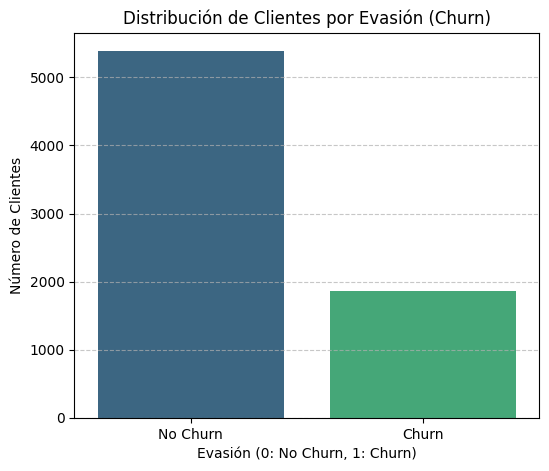


4. Exploración de Churn por Variables Categóricas:


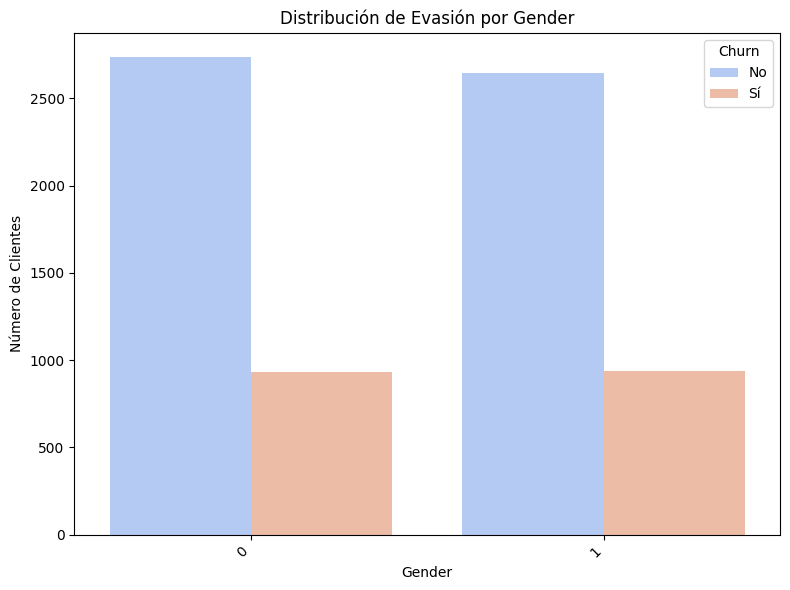

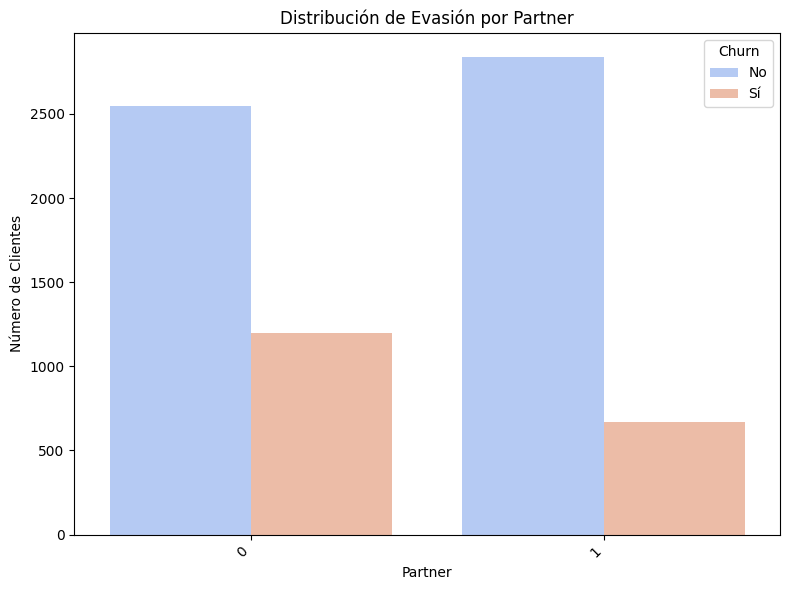

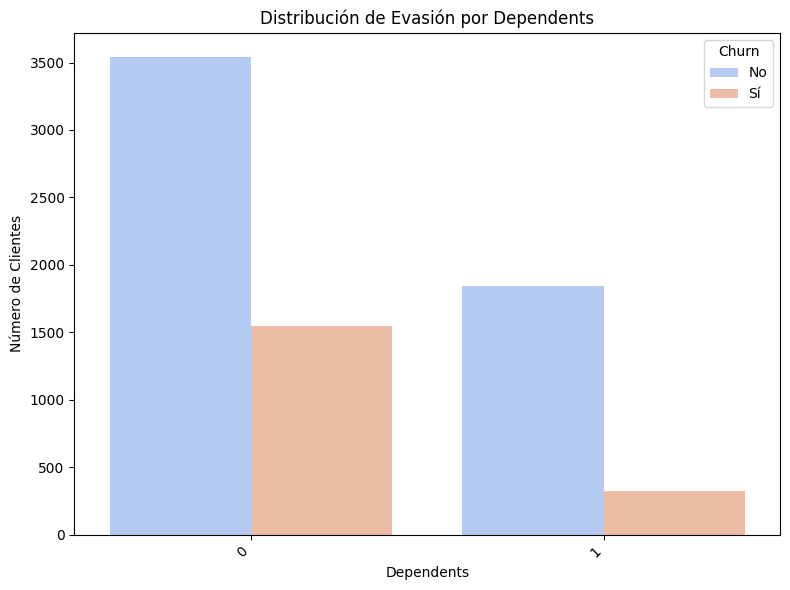

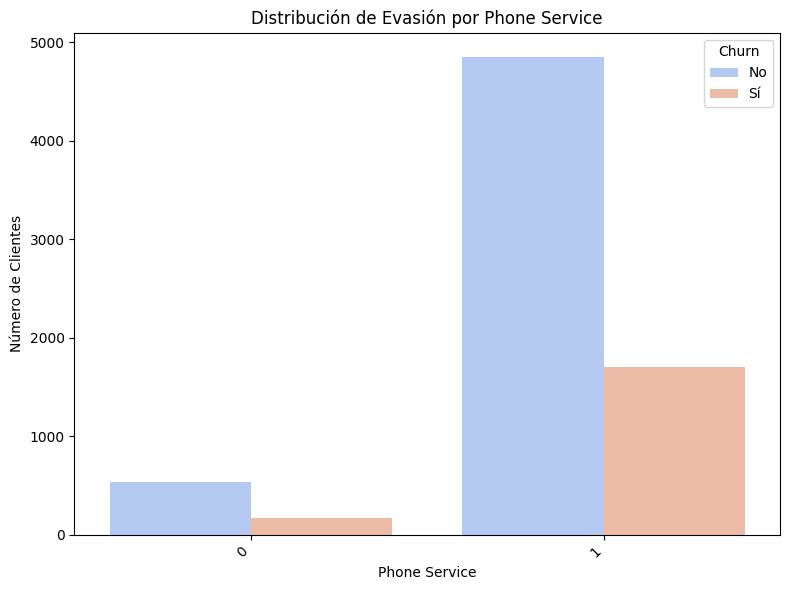

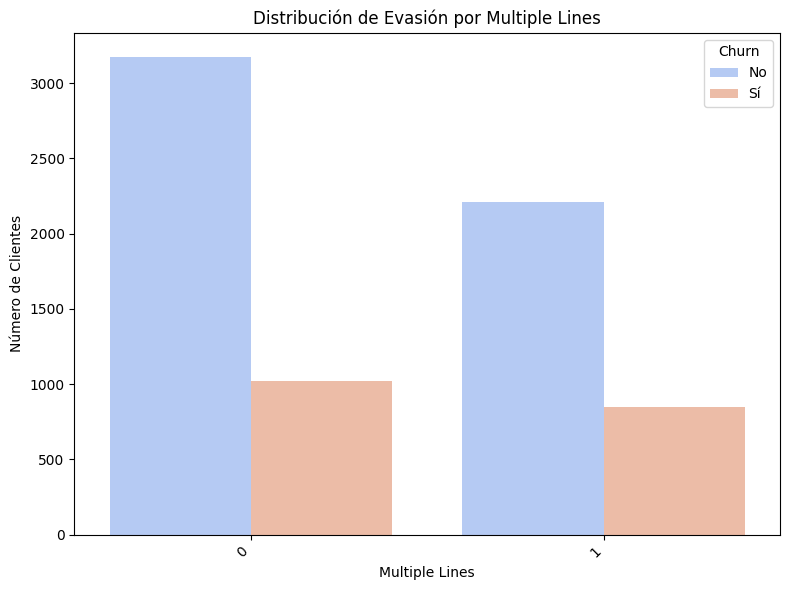

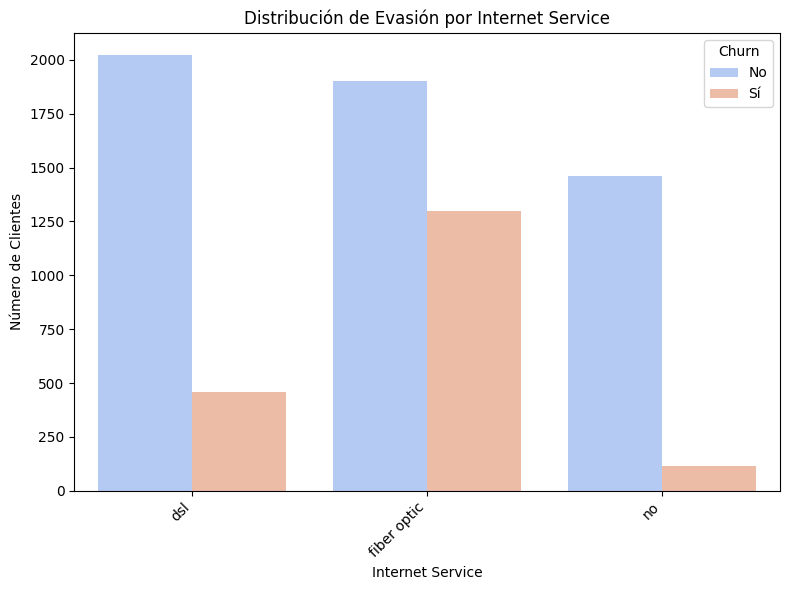

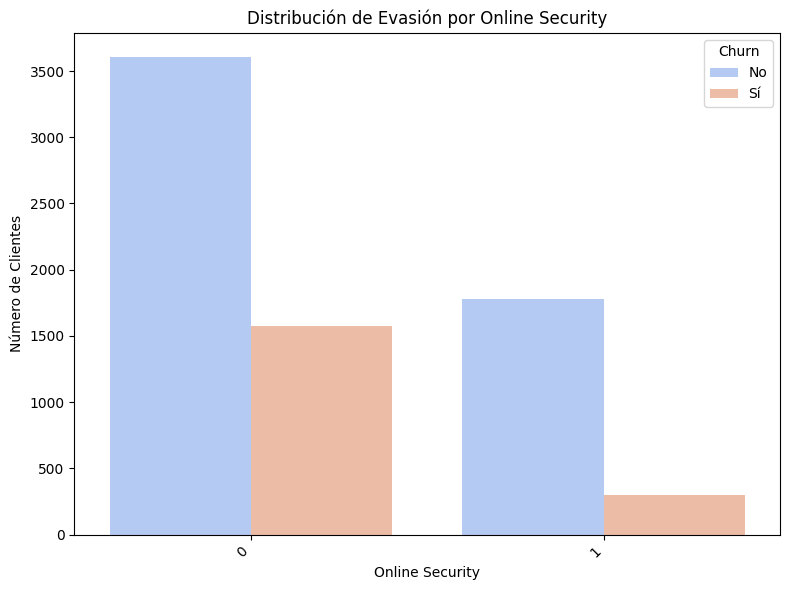

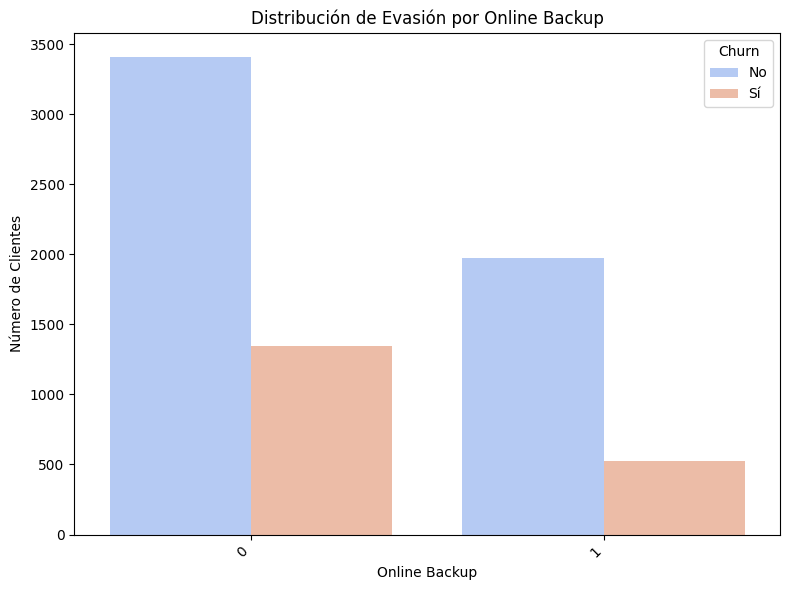

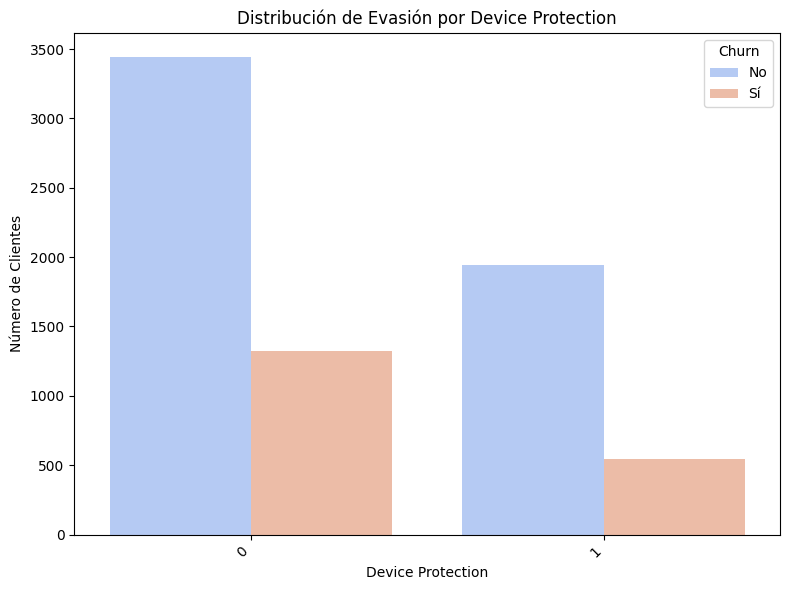

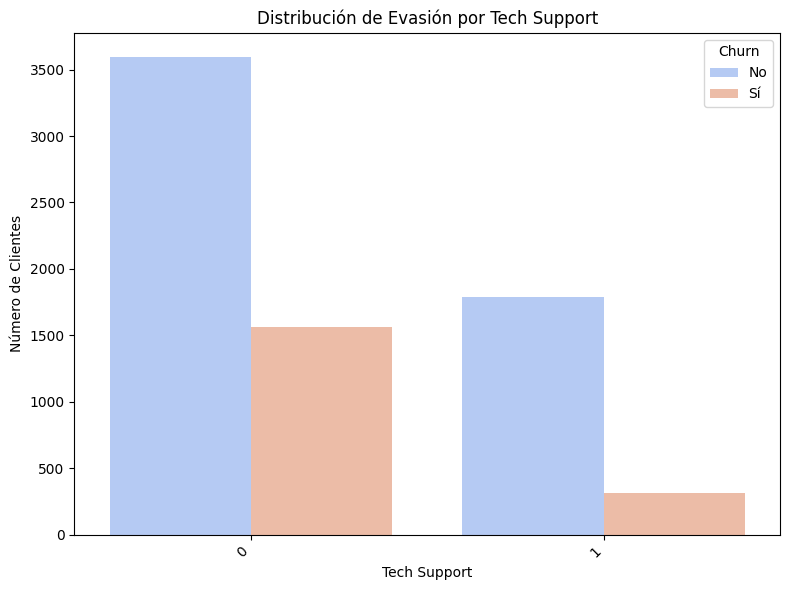

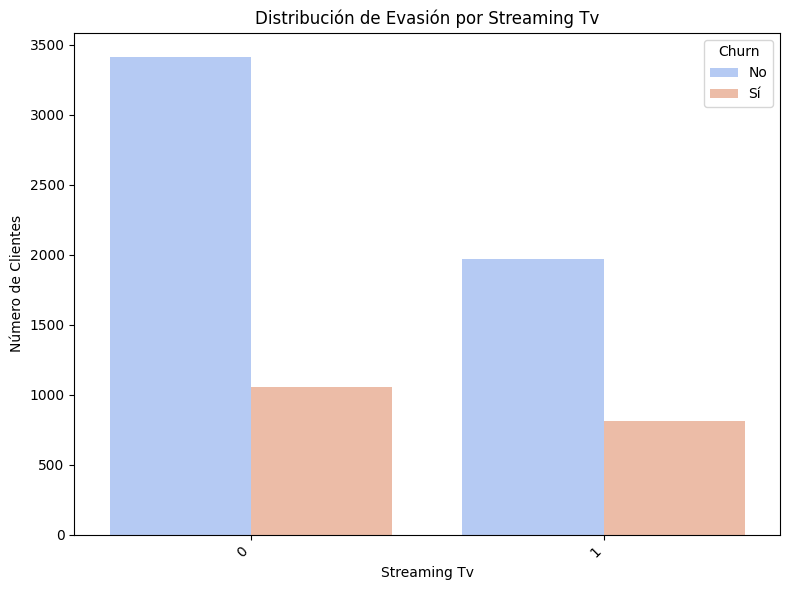

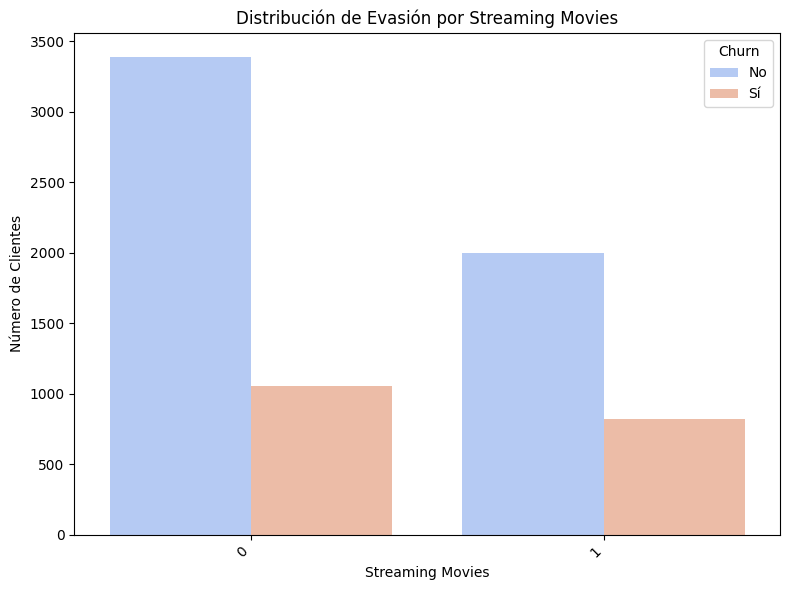

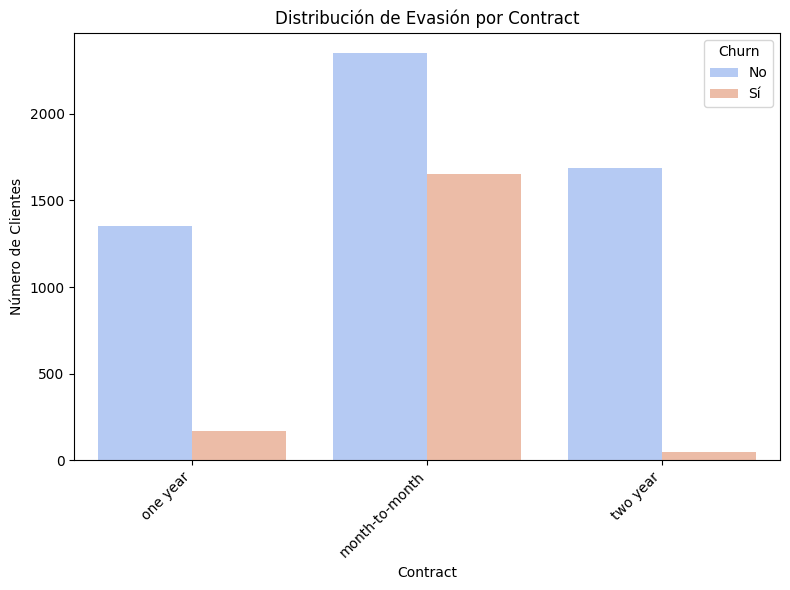

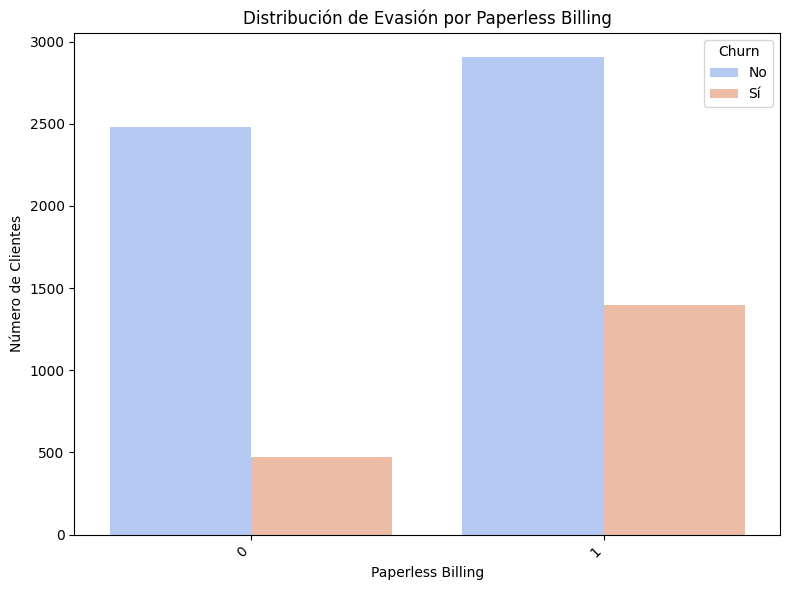

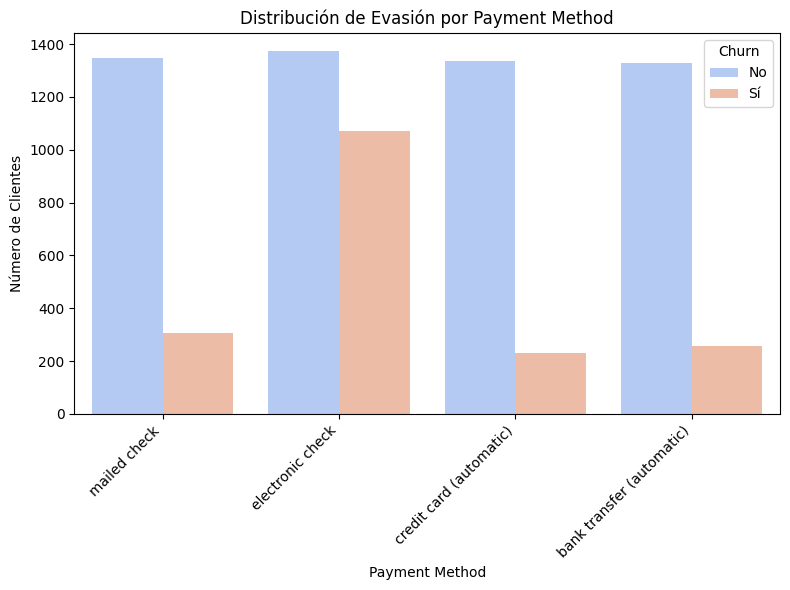

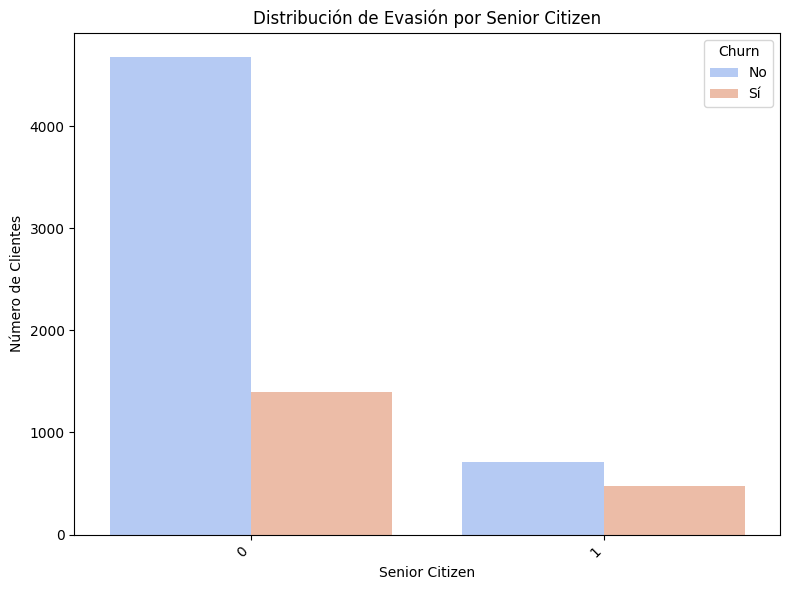


5. Exploración de Churn por Variables Numéricas:


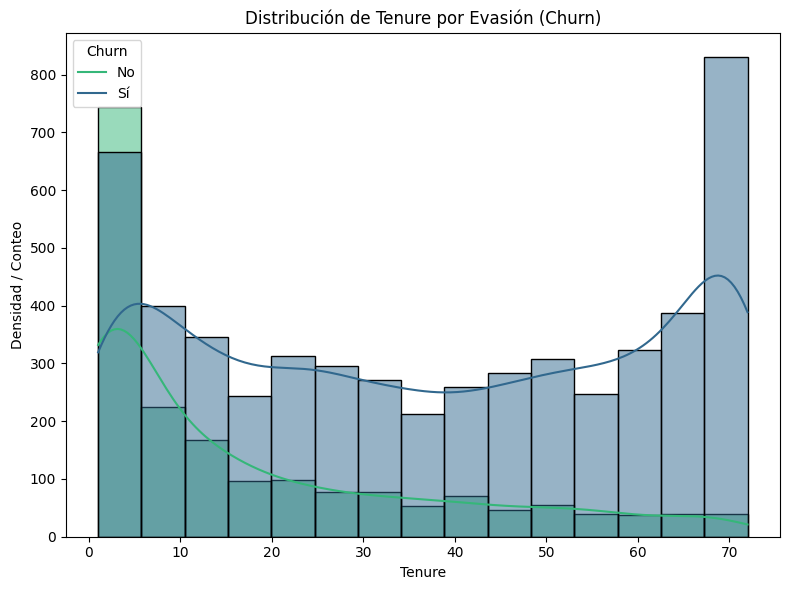

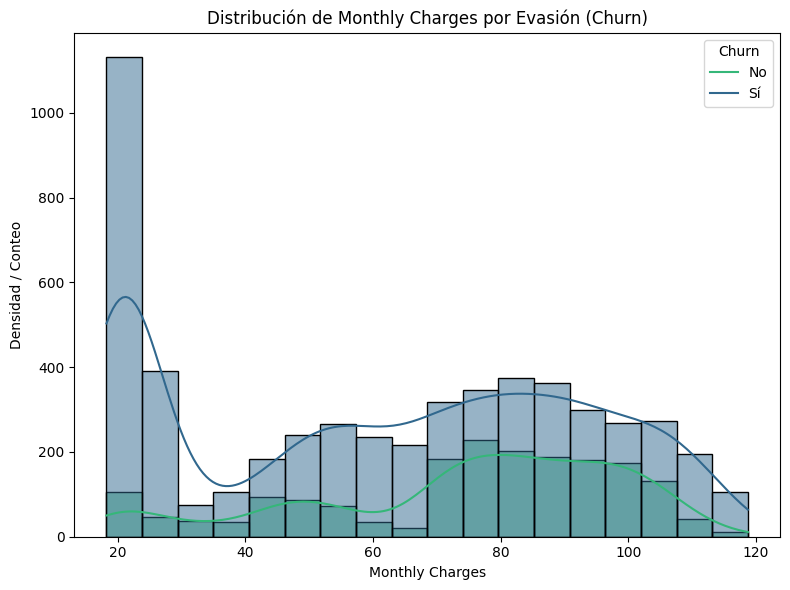

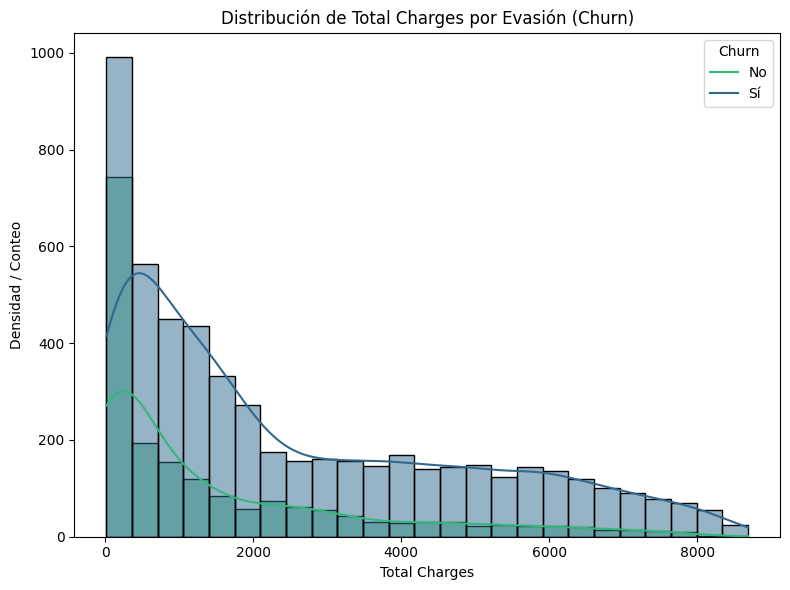

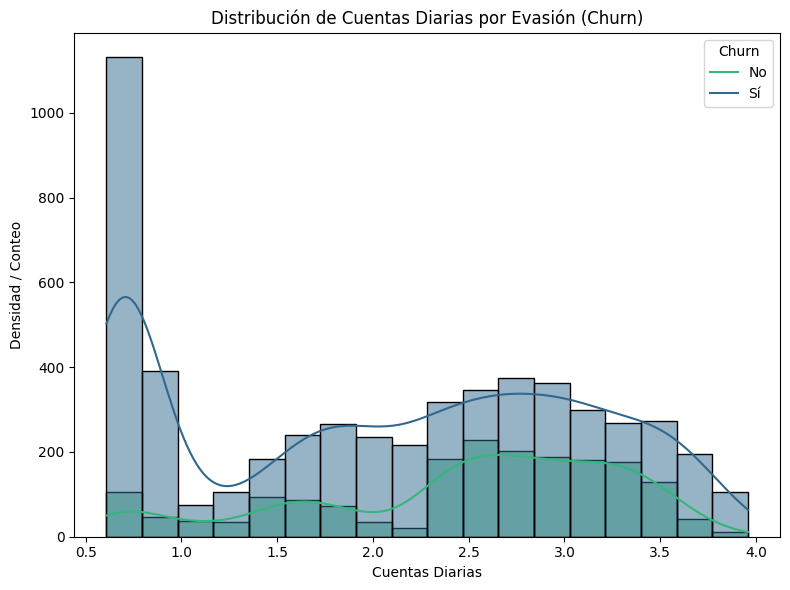



--- 🔹 Análisis de Correlación ---
Se explora la correlación entre las variables numéricas y su relación con la evasión.

Matriz de Correlación de Variables Numéricas (incluyendo Churn):
                      churn    gender  senior_citizen   partner  dependents  \
churn              1.000000  0.009494        0.146400 -0.148106   -0.160347   
gender             0.009494  1.000000        0.004239  0.004593   -0.011884   
senior_citizen     0.146400  0.004239        1.000000  0.023439   -0.212338   
partner           -0.148106  0.004593        0.023439  1.000000    0.448500   
dependents        -0.160347 -0.011884       -0.212338  0.448500    1.000000   
tenure            -0.345799 -0.005936        0.017333  0.379684    0.163444   
phone_service      0.012337  0.006065        0.009885  0.019496   -0.003212   
multiple_lines     0.039277  0.008259        0.144615  0.141673   -0.027691   
online_security   -0.166865  0.016301       -0.037877  0.141620    0.083775   
online_backup     -0.0

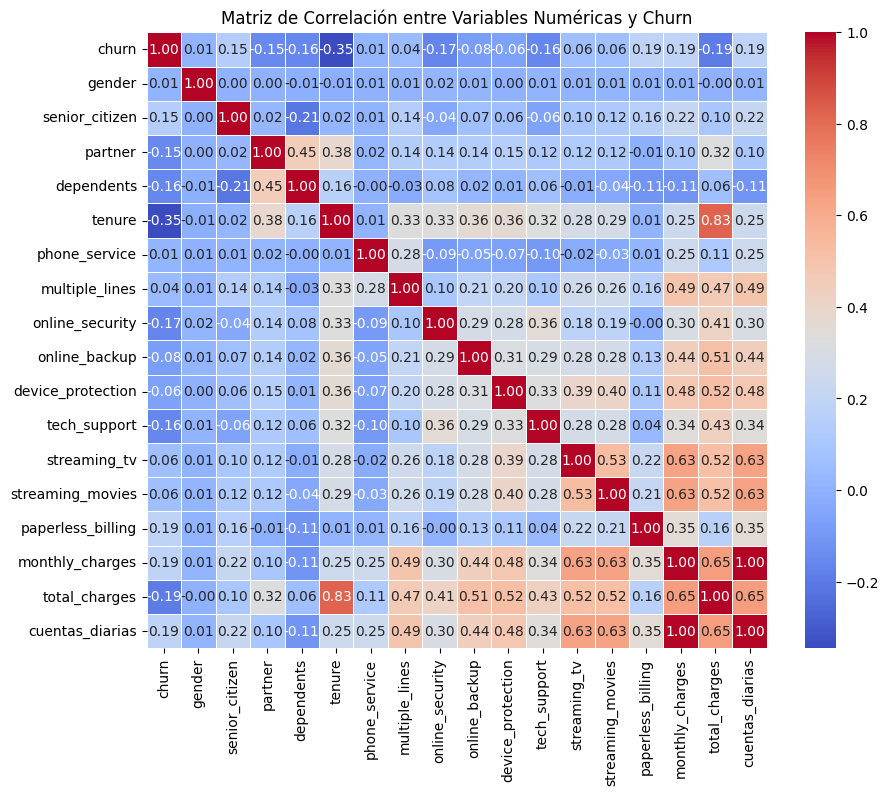


Relación entre 'Cuentas Diarias' y Evasión (Churn):


<ipython-input-26-880531cc007f>:266: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='cuentas_diarias', data=df, palette='pastel')


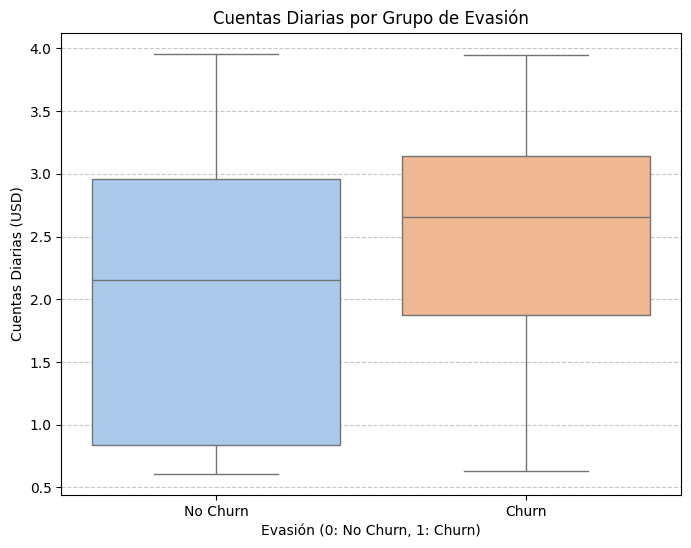


Relación entre la Cantidad de Servicios Contratados y Evasión (Churn):


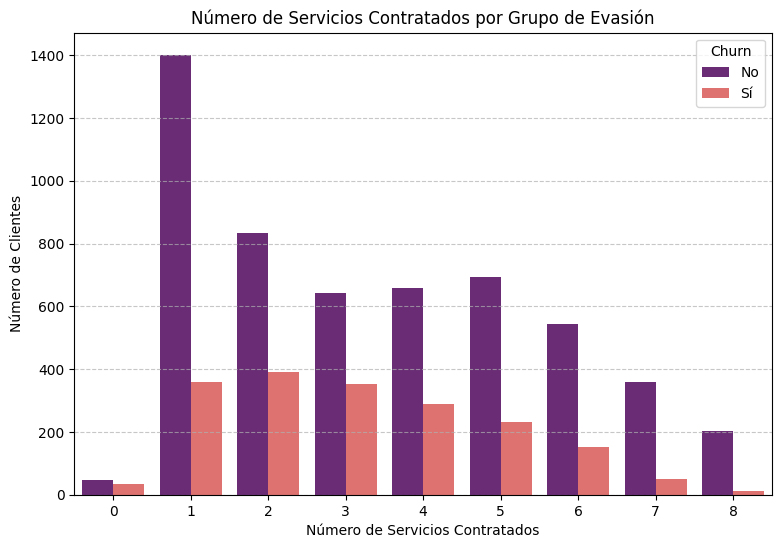



--- 🔹 Conclusiones e Insights ---
A partir del análisis exploratorio de datos, se extraen los siguientes hallazgos clave:
1.  **Desequilibrio de Clases en Churn**: La mayoría de los clientes no han evadido el servicio, lo que indica un desequilibrio en la variable objetivo. Esto es importante para la selección de modelos y métricas de evaluación.
2.  **Antigüedad (Tenure)**: Los clientes con menor antigüedad (pocos meses) tienen una tasa de evasión significativamente más alta. Esto sugiere que los primeros meses son críticos para la retención.
3.  **Tipo de Contrato**: Los clientes con contratos mes a mes presentan una tasa de evasión mucho mayor en comparación con aquellos con contratos de uno o dos años. Los contratos a largo plazo fomentan la lealtad.
4.  **Servicio de Internet (Fibra Óptica)**: Los clientes con servicio de fibra óptica muestran una tendencia más alta a evadir el servicio en comparación con DSL o sin servicio de internet. Esto podría indicar problemas de calidad o

In [26]:
import pandas as pd
import json
import requests # Importar la librería requests para hacer peticiones HTTP
import matplotlib.pyplot as plt # Importar matplotlib para graficar
import seaborn as sns # Importar seaborn para gráficos más estéticos

# Define la URL directa al archivo JSON en GitHub
# Asegúrate de que esta URL sea la URL "raw" del archivo JSON en GitHub.
# Por ejemplo: https://raw.githubusercontent.com/tu_usuario/tu_repositorio/main/tu_archivo.json
json_url = 'https://raw.githubusercontent.com/juacarato10/challenge2-data-science/refs/heads/main/TelecomX_Data.json' # URL de ejemplo, reemplázala con la tuya

try:
    # --- INICIO DEL REPORTE ---
    print("====================================================================================================")
    print("                                  INFORME DE ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)")
    print("====================================================================================================")

    # --- 🔹 Introducción ---
    print("\n--- 🔹 Introducción ---")
    print("Este informe detalla un análisis exhaustivo del problema de evasión de clientes (Churn) en una empresa de telecomunicaciones.")
    print("El objetivo principal es identificar los factores clave que influyen en la decisión de los clientes de cancelar sus servicios,")
    print("proporcionando insights valiosos y recomendaciones estratégicas para reducir la tasa de churn.")
    print("La evasión de clientes es un desafío crítico para las empresas, ya que la retención de clientes existentes suele ser más")
    print("rentable que la adquisición de nuevos. Comprender y predecir el churn permite a la empresa tomar medidas proactivas para")
    print("retener a sus clientes más valiosos.")

    print(f"\nIntentando descargar datos desde: {json_url}")
    # Realizar una petición GET a la URL
    response = requests.get(json_url)

    # Verificar si la petición fue exitosa (código de estado 200)
    response.raise_for_status() # Lanza una excepción si el código de estado no es 200 (ej. 404, 500)

    # Cargar los datos JSON desde el contenido de la respuesta
    data = json.loads(response.text)

    # Normalizar los datos JSON y crear un DataFrame
    df = pd.json_normalize(data)

    print("\nDataFrame creado exitosamente. Primeras 5 filas del dataset original:")
    print(df.head())

    print("\nInformación del DataFrame original:")
    df.info()

    # --- 🔹 Limpieza y Tratamiento de Datos ---
    print("\n\n--- 🔹 Limpieza y Tratamiento de Datos ---")
    print("Se realizaron los siguientes pasos para importar, limpiar y procesar los datos:")

    # --- Verificación de Problemas en los Datos (Pre-limpieza) ---
    print("\nVerificación Inicial de Problemas en los Datos:")
    print("\n1. Conteo de Valores Ausentes por Columna (Antes de Correcciones):")
    print(df.isnull().sum())
    num_duplicates_before = df.duplicated().sum()
    print(f"\n2. Número de Filas Duplicadas (Antes de Correcciones): {num_duplicates_before}")
    print("\n3. Verificación de 'account.Charges.Total' (Antes de Limpieza):")
    df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', pd.NA)
    df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
    total_charges_na_after_conversion = df['account.Charges.Total'].isnull().sum()
    if total_charges_na_after_conversion > 0:
        print(f"Se encontraron {total_charges_na_after_conversion} valores no numéricos o en blanco en 'account.Charges.Total' y se convirtieron a NaN.")
    else:
        print("'account.Charges.Total' se ha convertido a numérico exitosamente sin nuevos valores NaN.")
    print(f"Tipo de dato de 'account.Charges.Total' después de la limpieza inicial: {df['account.Charges.Total'].dtype}")


    print("\n--- Aplicando Correcciones a los Datos ---")

    # Corrección 1: Manejar valores NaN en 'account.Charges.Total'
    initial_rows = df.shape[0]
    df.dropna(subset=['account.Charges.Total'], inplace=True)
    rows_after_charges_na_drop = df.shape[0]
    print(f"Filas eliminadas debido a NaN en 'account.Charges.Total': {initial_rows - rows_after_charges_na_drop}")

    # Corrección 2: Eliminar filas duplicadas
    num_duplicates_before_drop = df.duplicated().sum()
    if num_duplicates_before_drop > 0:
        df.drop_duplicates(inplace=True)
        num_duplicates_after_drop = df.duplicated().sum()
        print(f"Filas duplicadas eliminadas: {num_duplicates_before_drop - num_duplicates_after_drop}")
    else:
        print("No se encontraron filas duplicadas para eliminar.")

    # Corrección 3: Normalizar inconsistencias en categorías (valores únicos)
    print("\nNormalizando valores categóricos (a minúsculas y sin espacios):")
    categorical_cols_to_normalize = [col for col in df.columns if df[col].dtype == 'object' and col != 'customerID']
    for col in categorical_cols_to_normalize:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.lower().str.strip()
            # print(f"Columna '{col}' normalizada. Nuevos valores únicos (primeros 10): {df[col].unique()[:10]}") # Comentado para no saturar la salida

    # --- Renombrar todas las columnas para mayor claridad y consistencia ---
    print("\nRenombrando columnas para mayor claridad y consistencia:")
    column_rename_map = {
        'customerID': 'customer_id',
        'Churn': 'churn',
        'customer.gender': 'gender',
        'customer.SeniorCitizen': 'senior_citizen',
        'customer.Partner': 'partner',
        'customer.Dependents': 'dependents',
        'customer.tenure': 'tenure',
        'phone.PhoneService': 'phone_service',
        'phone.MultipleLines': 'multiple_lines',
        'internet.InternetService': 'internet_service',
        'internet.OnlineSecurity': 'online_security',
        'internet.OnlineBackup': 'online_backup',
        'internet.DeviceProtection': 'device_protection',
        'internet.TechSupport': 'tech_support',
        'internet.StreamingTV': 'streaming_tv',
        'internet.StreamingMovies': 'streaming_movies',
        'account.Contract': 'contract',
        'account.PaperlessBilling': 'paperless_billing',
        'account.PaymentMethod': 'payment_method',
        'account.Charges.Monthly': 'monthly_charges',
        'account.Charges.Total': 'total_charges'
    }
    df.rename(columns=column_rename_map, inplace=True)
    print("Columnas renombradas exitosamente.")
    # print("Nuevos nombres de columnas (primeros 20):") # Comentado para no saturar la salida
    # print(df.columns.tolist()[:20])

    # --- Crear la columna "Cuentas_Diarias" ---
    print("\nCreando la columna 'cuentas_diarias' (facturación mensual / 30):")
    df['cuentas_diarias'] = df['monthly_charges'] / 30
    print("Columna 'cuentas_diarias' creada exitosamente.")
    # print("Primeras 5 filas con la nueva columna 'cuentas_diarias':") # Comentado para no saturar la salida
    # print(df[['monthly_charges', 'cuentas_diarias']].head())

    # --- Estandarización y Transformación de Datos ---
    print("\nEstandarización y Transformación de Datos (conversión a binario y manejo de NaNs):")
    binary_cols = [
        'churn', 'partner', 'dependents', 'phone_service', 'multiple_lines',
        'online_security', 'online_backup', 'device_protection',
        'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing'
    ]
    for col in binary_cols:
        if col in df.columns and df[col].dtype == 'object':
            df[col] = df[col].map({
                'yes': 1, 'no': 0, 'no phone service': 0, 'no internet service': 0
            }).fillna(0).astype(int)
            # print(f"Columna '{col}' convertida a binario. Tipo de dato: {df[col].dtype}") # Comentado para no saturar la salida
        elif col in df.columns and (df[col].dtype == 'int64' or df[col].dtype == 'float64'):
            pass # Ya es numérica, no se requiere conversión
        else:
            print(f"Advertencia: La columna '{col}' no se encontró o no es de tipo 'object' para la conversión binaria.")

    if 'gender' in df.columns and df['gender'].dtype == 'object':
        df['gender'] = df['gender'].map({'male': 0, 'female': 1}).fillna(0).astype(int)
        print("Columna 'gender' convertida a binario (male:0, female:1).")

    if df.empty:
        print("\nAdvertencia: El DataFrame está vacío después de las operaciones de limpieza. No se pueden realizar más análisis ni gráficos.")
        raise ValueError("DataFrame vacío después de la limpieza.")

    print("\n--- Resumen del DataFrame después de la Limpieza y Transformaciones ---")
    print(f"Número total de filas después de las correcciones: {df.shape[0]}")
    print("\nConteo de Valores Ausentes por Columna (Después de Transformaciones):")
    print(df.isnull().sum())
    print("\nInformación del DataFrame (Después de Transformaciones):")
    df.info()
    print("\nPrimeras 5 filas del DataFrame (Después de Transformaciones):")
    print(df.head())


    # --- 🔹 Análisis Exploratorio de Datos (EDA) ---
    print("\n\n--- 🔹 Análisis Exploratorio de Datos (EDA) ---")
    print("Se realizaron análisis descriptivos y visualizaciones para comprender la distribución y el comportamiento de los clientes.")

    print("\n1. Estadísticas Descriptivas para Columnas Numéricas:")
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if numeric_cols:
        print(df[numeric_cols].describe())
    else:
        print("No hay columnas numéricas para describir.")

    print("\n2. Conteo de Valores para Columnas Categóricas Clave:")
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    key_categorical_for_counts = [col for col in categorical_cols if col != 'customer_id']
    for col in key_categorical_for_counts:
        print(f"\nDistribución de '{col}':")
        print(df[col].value_counts())
        print(f"Porcentaje de Distribución de '{col}':")
        print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

    print("\n3. Visualización de la Distribución de 'churn':")
    if 'churn' in df.columns:
        plt.figure(figsize=(6, 5))
        sns.countplot(x='churn', data=df, palette='viridis')
        plt.title('Distribución de Clientes por Evasión (Churn)')
        plt.xlabel('Evasión (0: No Churn, 1: Churn)')
        plt.ylabel('Número de Clientes')
        plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("¡ERROR! La columna 'churn' NO se encontró para el gráfico de distribución.")

    print("\n4. Exploración de Churn por Variables Categóricas:")
    categorical_churn_analysis_cols = [
        'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
        'internet_service', 'online_security', 'online_backup', 'device_protection',
        'tech_support', 'streaming_tv', 'streaming_movies', 'contract',
        'paperless_billing', 'payment_method', 'senior_citizen'
    ]
    for col in categorical_churn_analysis_cols:
        if col in df.columns:
            plt.figure(figsize=(8, 6))
            sns.countplot(x=col, hue='churn', data=df, palette='coolwarm')
            plt.title(f'Distribución de Evasión por {col.replace("_", " ").title()}')
            plt.xlabel(col.replace("_", " ").title())
            plt.ylabel('Número de Clientes')
            plt.legend(title='Churn', labels=['No', 'Sí'])
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Advertencia: La columna '{col}' no se encontró para el análisis de evasión por categoría.")

    print("\n5. Exploración de Churn por Variables Numéricas:")
    numeric_churn_analysis_cols = [
        'tenure', 'monthly_charges', 'total_charges', 'cuentas_diarias'
    ]
    for col in numeric_churn_analysis_cols:
        if col in df.columns:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=col, hue='churn', kde=True, palette='viridis', common_norm=False)
            plt.title(f'Distribución de {col.replace("_", " ").title()} por Evasión (Churn)')
            plt.xlabel(col.replace("_", " ").title())
            plt.ylabel('Densidad / Conteo')
            plt.legend(title='Churn', labels=['No', 'Sí'])
            plt.tight_layout()
            plt.show()
        else:
            print(f"Advertencia: La columna numérica '{col}' no se encontró para el análisis de evasión.")

    # --- 🔹 Análisis de Correlación ---
    print("\n\n--- 🔹 Análisis de Correlación ---")
    print("Se explora la correlación entre las variables numéricas y su relación con la evasión.")

    # Calcular la matriz de correlación para columnas numéricas
    # Asegurarse de que 'churn' esté incluida y sea numérica (0/1)
    numeric_and_churn_cols = [col for col in df.select_dtypes(include=['number']).columns.tolist() if col != 'customer_id']
    if 'churn' in df.columns:
        if 'churn' not in numeric_and_churn_cols: # Add churn if it's not already there
            numeric_and_churn_cols.append('churn')
    else:
        print("Advertencia: La columna 'churn' no se encontró para el cálculo de correlación.")

    if numeric_and_churn_cols:
        correlation_matrix = df[numeric_and_churn_cols].corr()
        print("\nMatriz de Correlación de Variables Numéricas (incluyendo Churn):")
        print(correlation_matrix)

        # Visualizar la matriz de correlación (heatmap)
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Matriz de Correlación entre Variables Numéricas y Churn')
        plt.show()
    else:
        print("No hay suficientes columnas numéricas para calcular la matriz de correlación.")

    # Relación entre 'cuentas_diarias' y 'churn'
    print("\nRelación entre 'Cuentas Diarias' y Evasión (Churn):")
    if 'cuentas_diarias' in df.columns and 'churn' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='churn', y='cuentas_diarias', data=df, palette='pastel')
        plt.title('Cuentas Diarias por Grupo de Evasión')
        plt.xlabel('Evasión (0: No Churn, 1: Churn)')
        plt.ylabel('Cuentas Diarias (USD)')
        plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("Advertencia: Las columnas 'cuentas_diarias' o 'churn' no se encontraron para este análisis.")

    # Cómo la cantidad de servicios contratados afecta la probabilidad de churn
    print("\nRelación entre la Cantidad de Servicios Contratados y Evasión (Churn):")
    # Identificar columnas que representan servicios (binarias)
    service_cols = [
        'phone_service', 'multiple_lines', 'online_security', 'online_backup',
        'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
    ]
    # Crear una nueva columna 'num_services' sumando los servicios binarios
    df['num_services'] = df[service_cols].sum(axis=1)

    if 'num_services' in df.columns and 'churn' in df.columns:
        plt.figure(figsize=(9, 6))
        sns.countplot(x='num_services', hue='churn', data=df, palette='magma')
        plt.title('Número de Servicios Contratados por Grupo de Evasión')
        plt.xlabel('Número de Servicios Contratados')
        plt.ylabel('Número de Clientes')
        plt.legend(title='Churn', labels=['No', 'Sí'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("Advertencia: Las columnas necesarias para calcular 'num_services' o 'churn' no se encontraron.")


    # --- 🔹 Conclusiones e Insights ---
    print("\n\n--- 🔹 Conclusiones e Insights ---")
    print("A partir del análisis exploratorio de datos, se extraen los siguientes hallazgos clave:")
    print("1.  **Desequilibrio de Clases en Churn**: La mayoría de los clientes no han evadido el servicio, lo que indica un desequilibrio en la variable objetivo. Esto es importante para la selección de modelos y métricas de evaluación.")
    print("2.  **Antigüedad (Tenure)**: Los clientes con menor antigüedad (pocos meses) tienen una tasa de evasión significativamente más alta. Esto sugiere que los primeros meses son críticos para la retención.")
    print("3.  **Tipo de Contrato**: Los clientes con contratos mes a mes presentan una tasa de evasión mucho mayor en comparación con aquellos con contratos de uno o dos años. Los contratos a largo plazo fomentan la lealtad.")
    print("4.  **Servicio de Internet (Fibra Óptica)**: Los clientes con servicio de fibra óptica muestran una tendencia más alta a evadir el servicio en comparación con DSL o sin servicio de internet. Esto podría indicar problemas de calidad o expectativas no cumplidas con la fibra óptica.")
    print("5.  **Cargos Mensuales y Totales**: Los clientes con cargos mensuales más altos, especialmente aquellos que usan fibra óptica, tienen una mayor probabilidad de evadir. Los cargos totales bajos también se asocian con mayor churn, lo que se alinea con la menor antigüedad.")
    print("6.  **Servicios Adicionales**: La ausencia de servicios como seguridad en línea, respaldo en línea, protección de dispositivos y soporte técnico está asociada con una mayor tasa de evasión. Estos servicios parecen ser factores de retención.")
    print("7.  **Método de Pago (Cheque Electrónico)**: Los clientes que utilizan el cheque electrónico como método de pago tienen una tasa de evasión notablemente más alta. Esto podría estar relacionado con la facilidad de cancelación o con un perfil de cliente más propenso a cambiar.")
    print("8.  **Facturación sin Papel**: Los clientes con facturación sin papel muestran una tasa de evasión ligeramente más alta. Esto podría ser un indicador de un perfil de cliente más digital y propenso a buscar alternativas en línea.")
    print("9.  **Género y Ciudadano Senior**: Estas variables no parecen tener un impacto significativo en la tasa de evasión, lo que sugiere que el churn no está fuertemente influenciado por estos factores demográficos en este dataset.")
    print("10. **Correlación de Cargos y Antigüedad con Churn**: Existe una correlación positiva moderada entre `monthly_charges` y `churn`, y una correlación negativa fuerte entre `tenure` y `churn`. Esto refuerza que los clientes nuevos y con cargos mensuales altos son más propensos a evadir.")
    print("11. **Cuentas Diarias y Churn**: La distribución de `cuentas_diarias` muestra que los clientes con mayor evasión tienden a tener `cuentas_diarias` más altas, lo que es coherente con `monthly_charges`.")
    print("12. **Número de Servicios y Churn**: Los clientes con menos servicios contratados (especialmente 1 o 2) tienen una mayor tasa de evasión, lo que sugiere que la diversificación de servicios aumenta la lealtad.")


    # --- 🔹 Recomendaciones ---
    print("\n\n--- 🔹 Recomendaciones ---")
    print("Basado en los hallazgos anteriores, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:")
    print("1.  **Programas de Retención para Nuevos Clientes**: Implementar programas de bienvenida y seguimiento intensivo durante los primeros 6 meses de servicio para clientes nuevos, ofreciendo soporte proactivo y resolviendo cualquier inquietud rápidamente.")
    print("2.  **Incentivar Contratos a Largo Plazo**: Ofrecer descuentos atractivos o beneficios adicionales a los clientes que opten por contratos de uno o dos años, desincentivando los contratos mes a mes.")
    print("3.  **Mejorar la Experiencia de Fibra Óptica**: Investigar y abordar las posibles causas de insatisfacción entre los clientes de fibra óptica (ej., velocidad inconsistente, problemas de conexión, soporte técnico). Mejorar la calidad del servicio y la comunicación sobre el mismo.")
    print("4.  **Promover Servicios de Valor Añadido**: Educar a los clientes sobre los beneficios de la seguridad en línea, respaldo, protección de dispositivos y soporte técnico. Considerar ofrecer paquetes atractivos que incluyan estos servicios.")
    print("5.  **Optimizar Métodos de Pago**: Analizar por qué los clientes que usan cheque electrónico tienen mayor churn. Podría implicar ofrecer incentivos para cambiar a métodos de pago más estables (ej., domiciliación bancaria) o mejorar la experiencia de pago con cheque electrónico.")
    print("6.  **Segmentación y Ofertas Personalizadas**: Utilizar los insights sobre los perfiles de alto riesgo (ej., contratos mes a mes, fibra óptica, sin servicios adicionales) para crear campañas de retención personalizadas.")
    print("7.  **Monitoreo Continuo**: Establecer un sistema de monitoreo continuo de las métricas de churn y los factores influyentes para adaptar las estrategias en tiempo real.")
    print("8.  **Feedback del Cliente**: Implementar encuestas de satisfacción y canales de feedback para identificar problemas antes de que el cliente decida irse.")
    print("9.  **Paquetes de Servicios**: Diseñar paquetes de servicios que incluyan múltiples ofertas (ej., internet, teléfono, seguridad) para aumentar el número de servicios por cliente y, por ende, su lealtad.")

    print("\n====================================================================================================")
    print("                                  FIN DEL INFORME")
    print("====================================================================================================")

except requests.exceptions.RequestException as req_err:
    print(f"Error de conexión o petición HTTP: {req_err}")
    print("Asegúrate de que la URL sea correcta y tengas conexión a internet.")
except json.JSONDecodeError as jde:
    print(f"Error al decodificar el JSON. Asegúrate de que el contenido de la URL sea un JSON válido: {jde}")
except ValueError as ve:
    print(f"Error de procesamiento de datos: {ve}")
except KeyError as ke:
    print(f"Error de columna no encontrada: {ke}")
except Exception as e:
    print(f"Ocurrió un error inesperado al cargar o procesar los datos: {e}")
